In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
color_pal = sns.color_palette()
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_csv('datasets/TATASTEEL.csv')
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,TISCO,EQ,142.35,148.00,153.2,146.10,152.50,152.45,150.92,2003185,3.023164e+13,NaN,NaN,NaN
1,2000-01-04,TISCO,EQ,152.45,150.10,153.0,143.05,151.95,150.80,151.03,1555136,2.348785e+13,NaN,NaN,NaN
2,2000-01-05,TISCO,EQ,150.80,144.60,162.9,144.60,158.00,156.55,156.85,3840284,6.023364e+13,NaN,NaN,NaN
3,2000-01-06,TISCO,EQ,156.55,158.95,169.1,158.95,169.00,168.25,167.61,2560449,4.291530e+13,NaN,NaN,NaN
4,2000-01-07,TISCO,EQ,168.25,173.40,179.0,166.30,170.55,171.95,173.89,3641691,6.332459e+13,NaN,NaN,NaN


In [3]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03,2456.000000,4.792000e+03,4792.000000
mean,403.385658,404.253581,411.210460,396.509197,403.467414,403.553703,404.062991,6.165253e+06,2.664876e+14,93969.268730,1.550750e+06,0.260951
std,187.146366,187.559958,190.791329,183.858461,187.265190,187.312178,187.436529,5.329084e+06,3.012861e+14,58218.860189,1.215813e+06,0.107903
min,67.250000,66.000000,69.700000,66.000000,67.300000,67.250000,67.970000,2.329100e+04,2.159165e+11,2796.000000,2.415800e+04,0.045100
25%,275.775000,275.600000,284.412500,270.000000,275.812500,275.937500,276.935000,2.801380e+06,1.118719e+14,57557.250000,7.698500e+05,0.180500
50%,402.850000,403.000000,409.375000,396.650000,402.700000,402.900000,403.430000,4.800300e+06,1.949303e+14,79400.000000,1.250946e+06,0.253000
75%,523.987500,525.000000,534.725000,516.487500,523.950000,524.075000,525.230000,7.833888e+06,3.379640e+14,110710.250000,2.018066e+06,0.327700
max,1031.350000,1024.000000,1052.600000,1011.100000,1035.000000,1034.000000,1031.950000,6.428460e+07,4.881124e+15,626502.000000,2.643472e+07,0.970100


In [4]:
df.shape

(5306, 15)

In [5]:
df.dtypes

Date                   object
Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [6]:
df.isnull().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     514
%Deliverble            514
dtype: int64

In [7]:
df.dropna(axis = 1, inplace = True)
df.isna().sum()

Date          0
Symbol        0
Series        0
Prev Close    0
Open          0
High          0
Low           0
Last          0
Close         0
VWAP          0
Volume        0
Turnover      0
dtype: int64

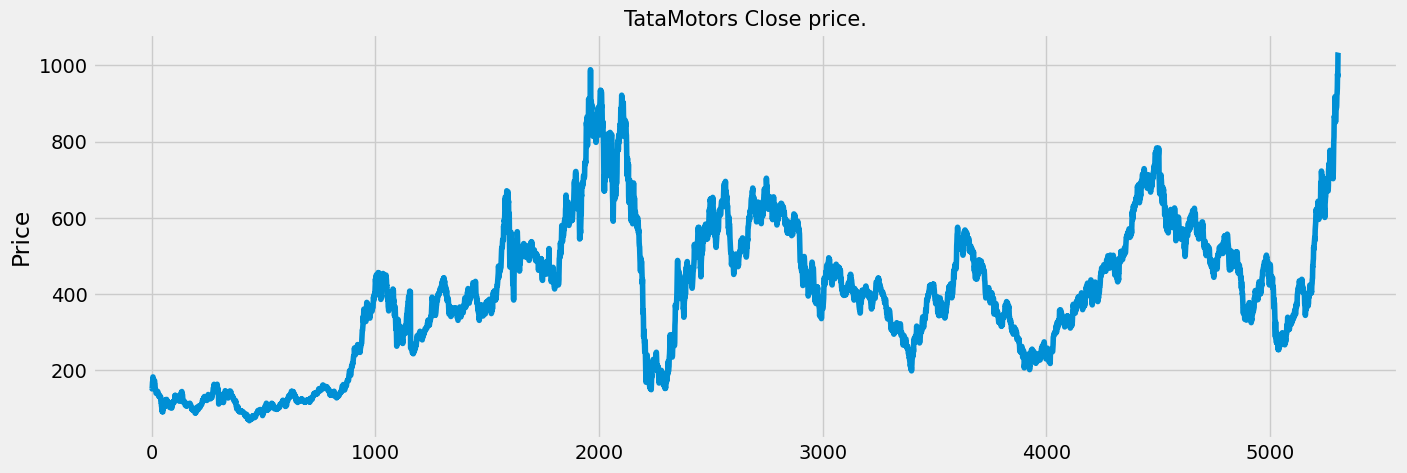

In [8]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('TataMotors Close price.', fontsize=15)
plt.ylabel('Price')
plt.show()

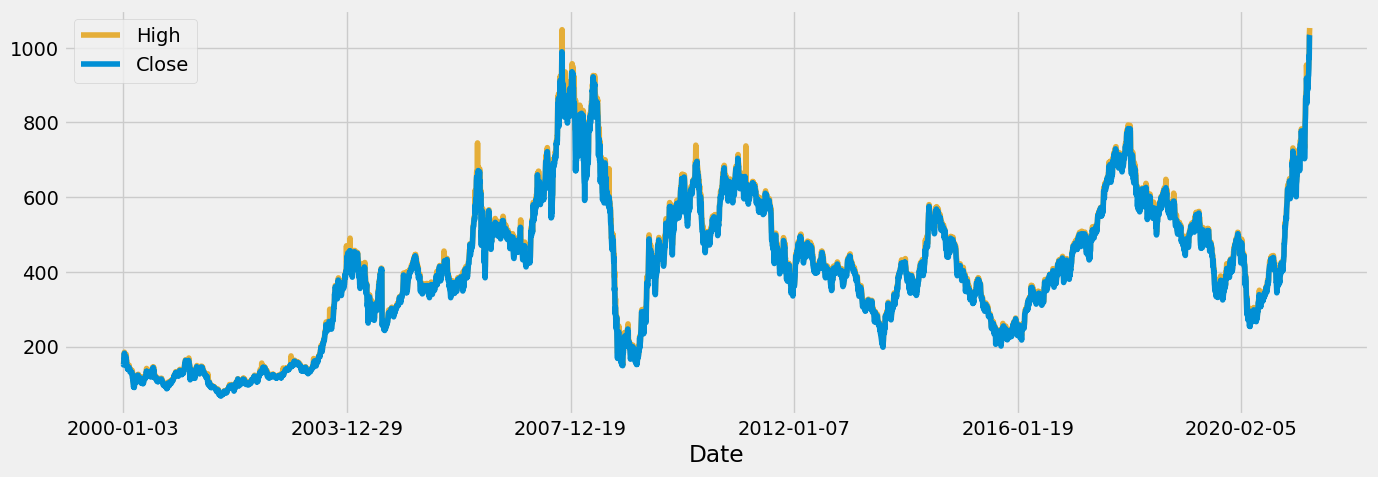

In [9]:
fig,ax = plt.subplots(figsize=(15,5))
df.plot(ax=ax,x='Date',y='High',color=color_pal[2])
df.plot(ax=ax,x='Date',y='Close',color=color_pal[0])
plt.show()

<Axes: >

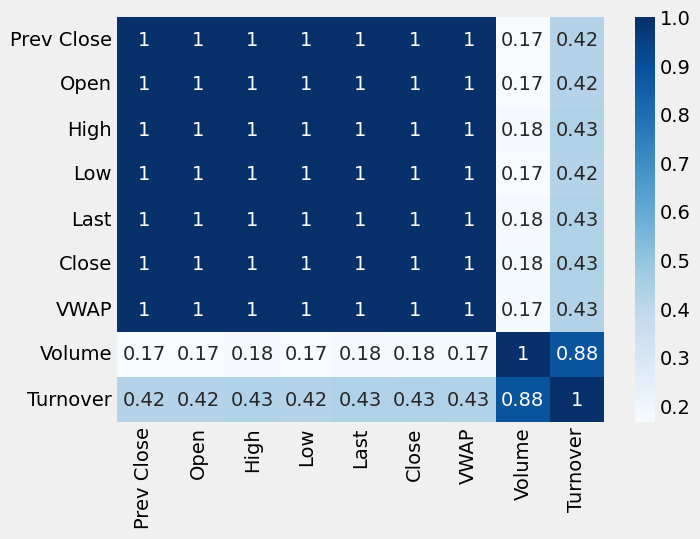

In [10]:
plt.figure(figsize=(7,5))
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(),cmap='Blues',annot=True)

In [11]:
df['open-high'] = df['Open']-df['High']
df['open-low'] = df['Open'] - df['Low']
df['close-high'] = df['Close']-df['High']
df['close-low'] = df['Close'] - df['Low']
df['high-low'] = df['High'] - df['Low']
df['open-close'] = df['Open'] - df['Close']
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,open-high,open-low,close-high,close-low,high-low,open-close
0,2000-01-03,TISCO,EQ,142.35,148.00,153.2,146.10,152.50,152.45,150.92,2003185,3.023164e+13,-5.20,1.90,-0.75,6.35,7.10,-4.45
1,2000-01-04,TISCO,EQ,152.45,150.10,153.0,143.05,151.95,150.80,151.03,1555136,2.348785e+13,-2.90,7.05,-2.20,7.75,9.95,-0.70
2,2000-01-05,TISCO,EQ,150.80,144.60,162.9,144.60,158.00,156.55,156.85,3840284,6.023364e+13,-18.30,0.00,-6.35,11.95,18.30,-11.95
3,2000-01-06,TISCO,EQ,156.55,158.95,169.1,158.95,169.00,168.25,167.61,2560449,4.291530e+13,-10.15,0.00,-0.85,9.30,10.15,-9.30
4,2000-01-07,TISCO,EQ,168.25,173.40,179.0,166.30,170.55,171.95,173.89,3641691,6.332459e+13,-5.60,7.10,-7.05,5.65,12.70,1.45


<Axes: >

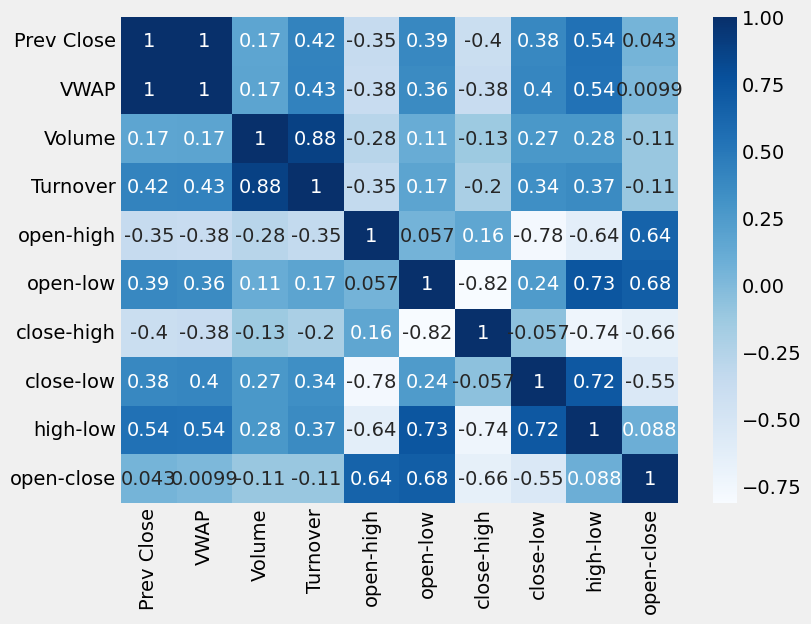

In [12]:
data2 = df.copy()
data2 = data2.drop(['Open','High','Low','Last', 'Close'],axis=1)
plt.figure(figsize=(8,6))
numeric_data2 = data2.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_data2.corr(),cmap='Blues',annot=True)

In [13]:
from sklearn.preprocessing import LabelEncoder

# create a LabelEncoder object
le = LabelEncoder()

# fit and transform the column(s) to be encoded
df['Symbol'] = le.fit_transform(df['Symbol'])

In [14]:
# Convert date column to datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Extract year, month, and day into separate columns
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [15]:
df.drop('Date', axis = 1, inplace = True)

In [16]:
df.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,open-high,open-low,close-high,close-low,high-low,open-close,year,month,day
0,1,EQ,142.35,148.00,153.2,146.10,152.50,152.45,150.92,2003185,3.023164e+13,-5.20,1.90,-0.75,6.35,7.10,-4.45,2000,1,3
1,1,EQ,152.45,150.10,153.0,143.05,151.95,150.80,151.03,1555136,2.348785e+13,-2.90,7.05,-2.20,7.75,9.95,-0.70,2000,1,4
2,1,EQ,150.80,144.60,162.9,144.60,158.00,156.55,156.85,3840284,6.023364e+13,-18.30,0.00,-6.35,11.95,18.30,-11.95,2000,1,5
3,1,EQ,156.55,158.95,169.1,158.95,169.00,168.25,167.61,2560449,4.291530e+13,-10.15,0.00,-0.85,9.30,10.15,-9.30,2000,1,6
4,1,EQ,168.25,173.40,179.0,166.30,170.55,171.95,173.89,3641691,6.332459e+13,-5.60,7.10,-7.05,5.65,12.70,1.45,2000,1,7


In [17]:
df.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'open-high', 'open-low',
       'close-high', 'close-low', 'high-low', 'open-close', 'year', 'month',
       'day'],
      dtype='object')

In [18]:
columns = ['Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'open-high', 'open-low',
       'close-high', 'close-low', 'high-low', 'open-close', 'year', 'month',
       'day']

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2500x600 with 0 Axes>

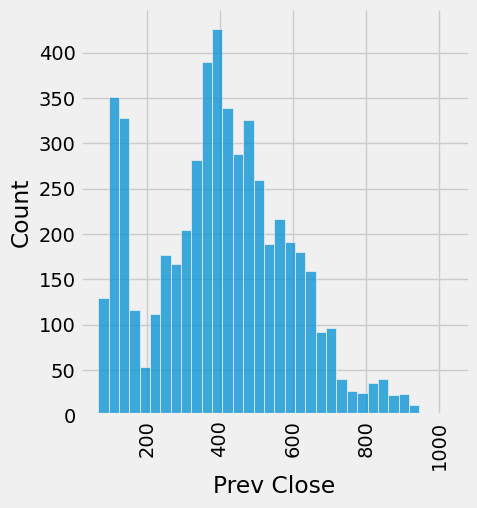

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2500x600 with 0 Axes>

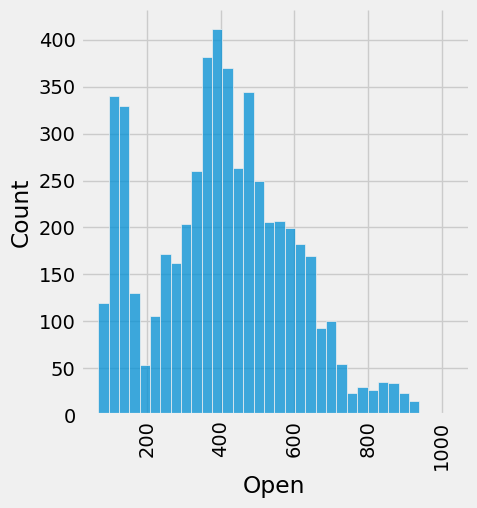

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2500x600 with 0 Axes>

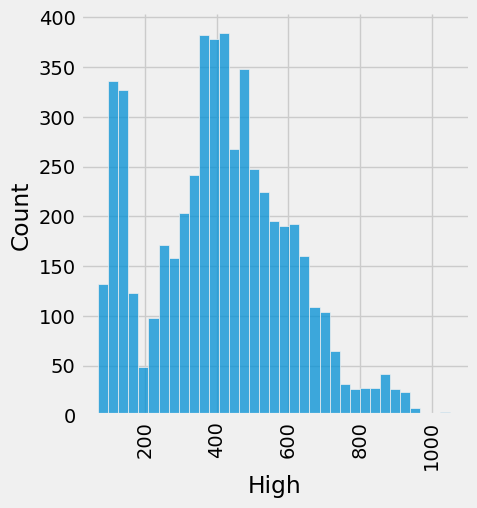

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2500x600 with 0 Axes>

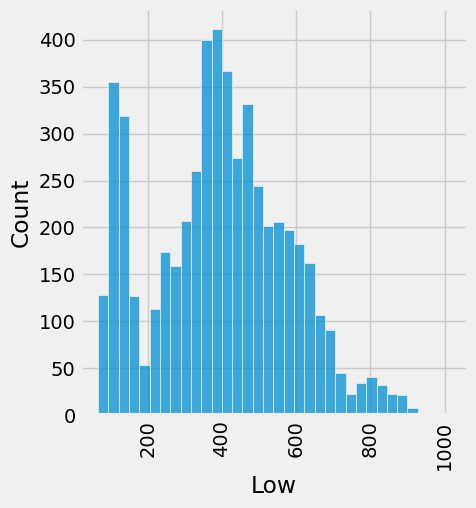

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2500x600 with 0 Axes>

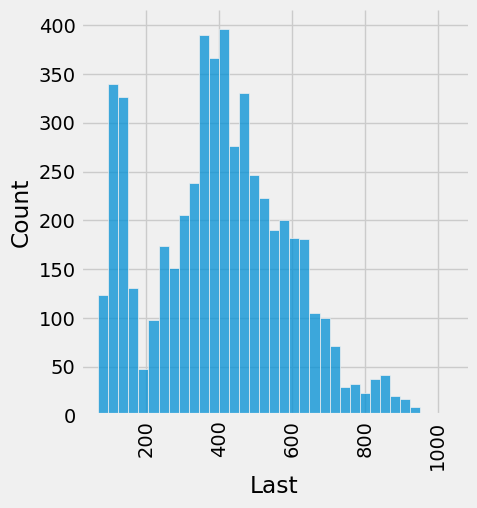

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2500x600 with 0 Axes>

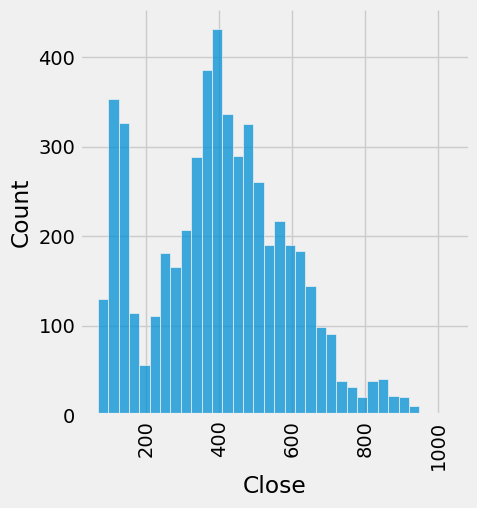

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2500x600 with 0 Axes>

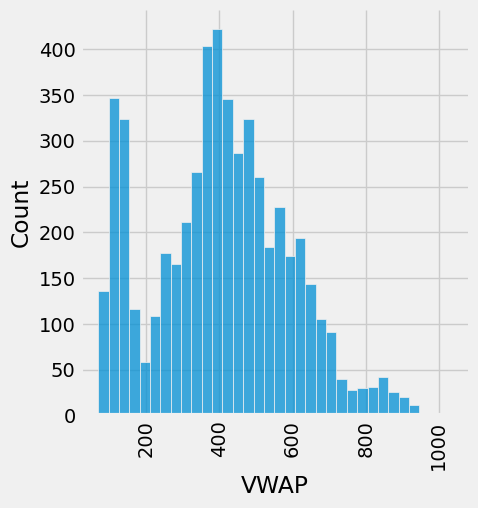

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2500x600 with 0 Axes>

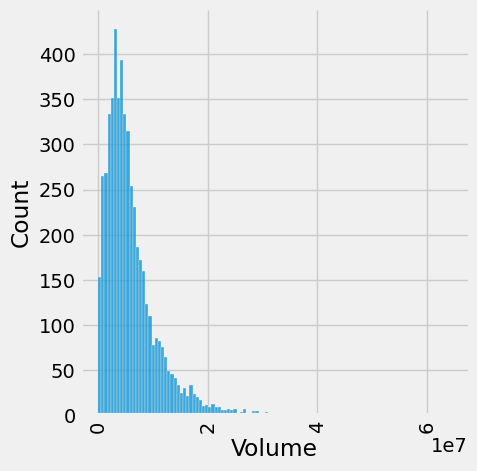

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2500x600 with 0 Axes>

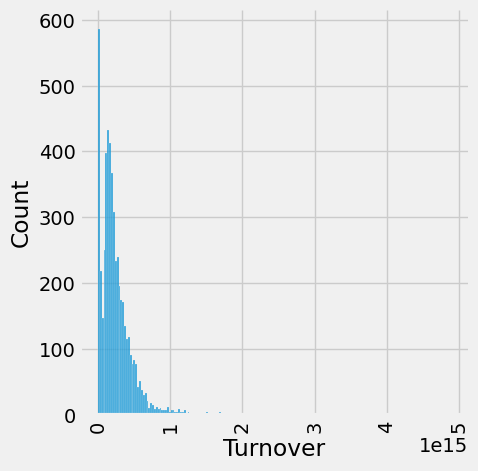

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2500x600 with 0 Axes>

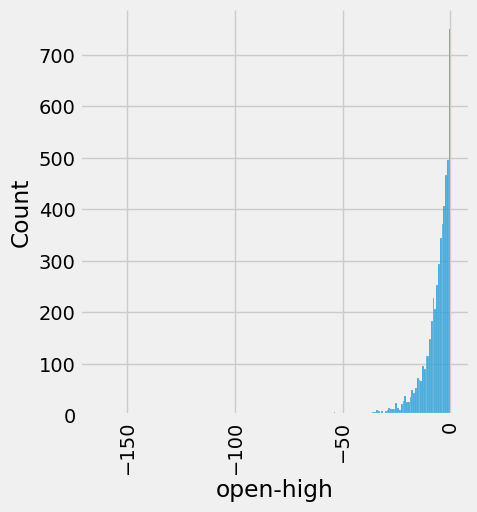

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2500x600 with 0 Axes>

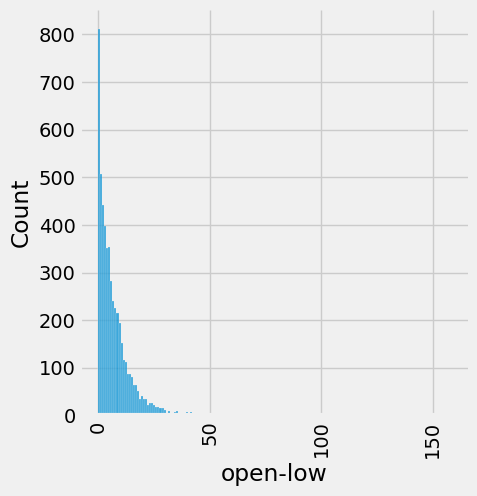

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2500x600 with 0 Axes>

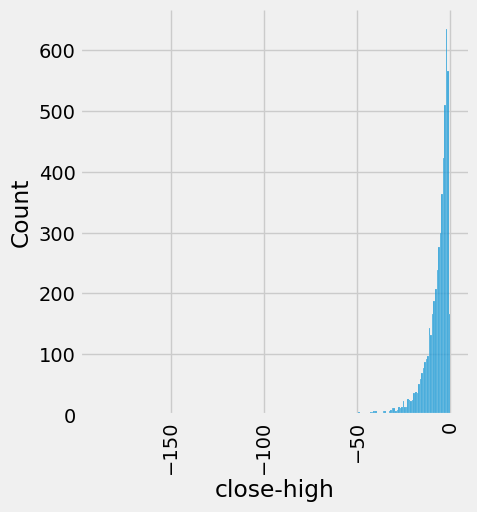

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2500x600 with 0 Axes>

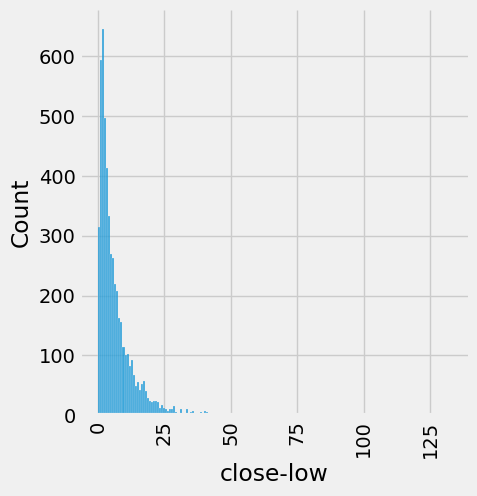

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2500x600 with 0 Axes>

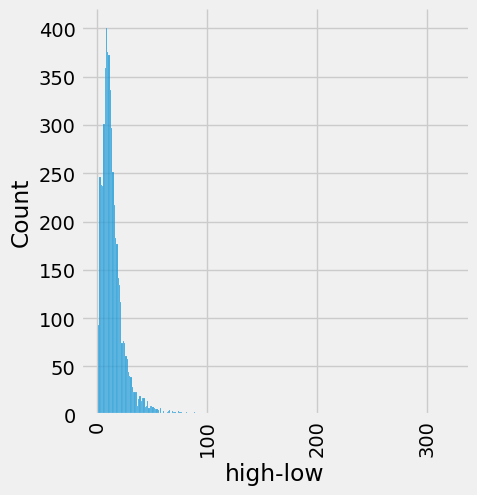

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2500x600 with 0 Axes>

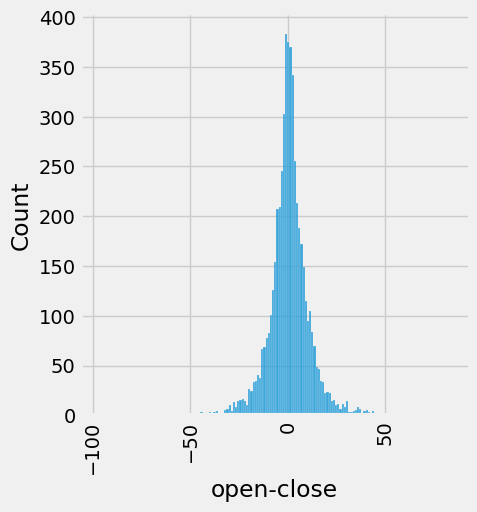

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2500x600 with 0 Axes>

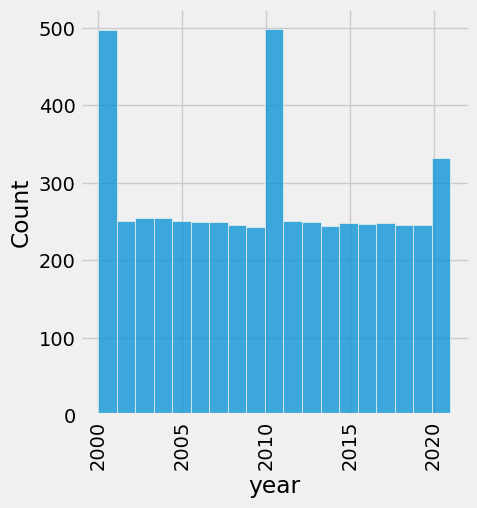

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2500x600 with 0 Axes>

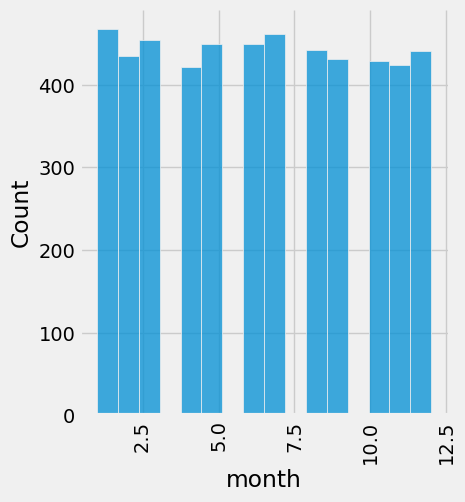

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2500x600 with 0 Axes>

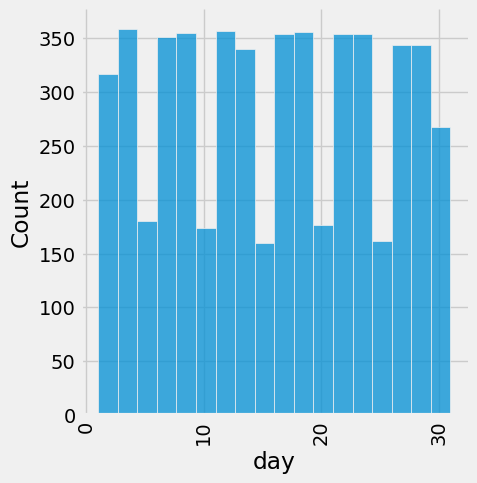

In [19]:
for column in columns:
    plt.figure(figsize = (25,6))
    sns.displot(df[column])
    plt.xticks(rotation=90)
    plt.show()

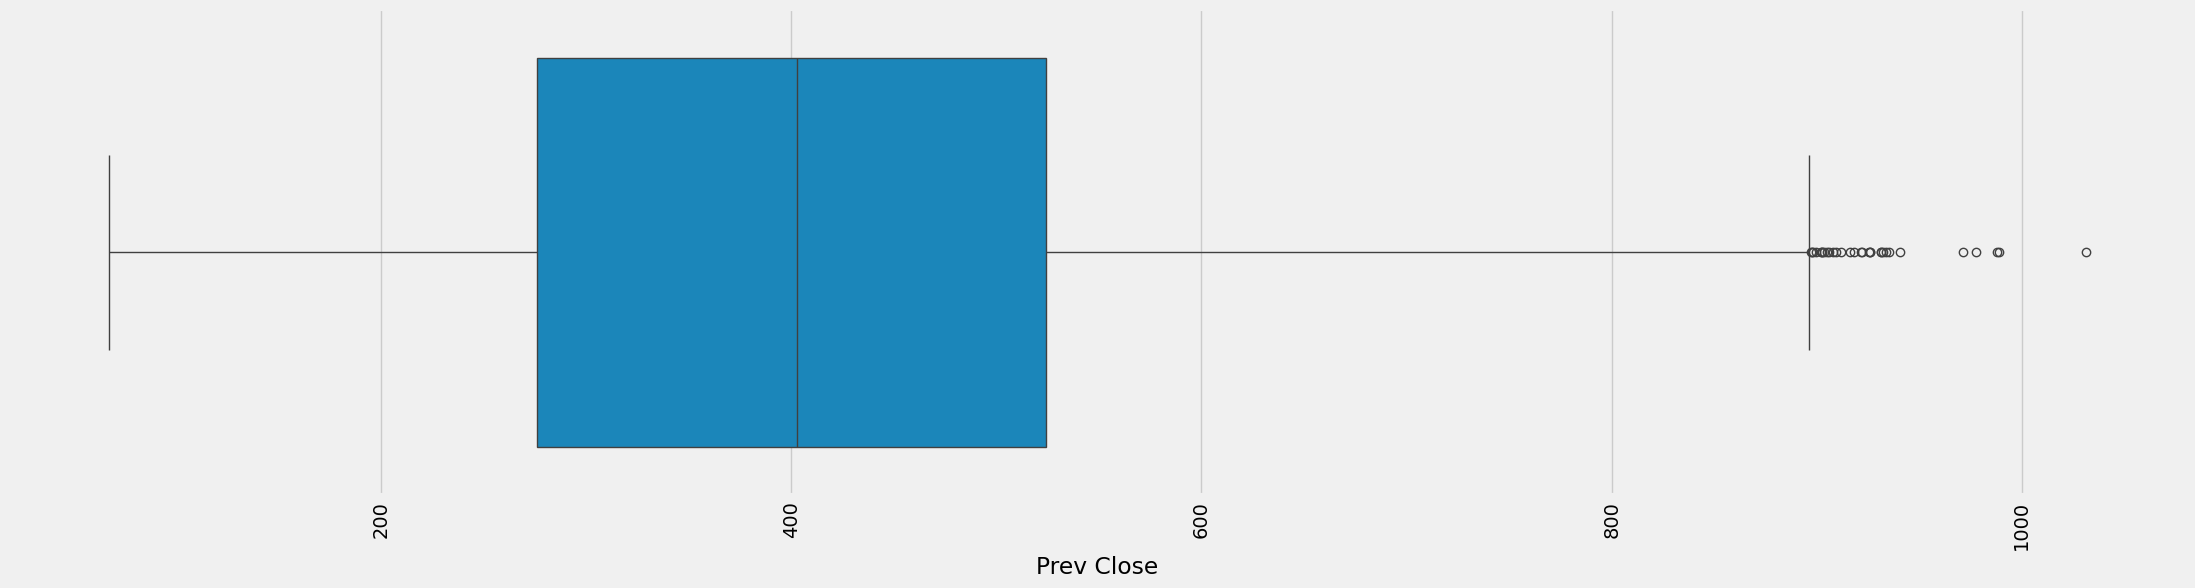

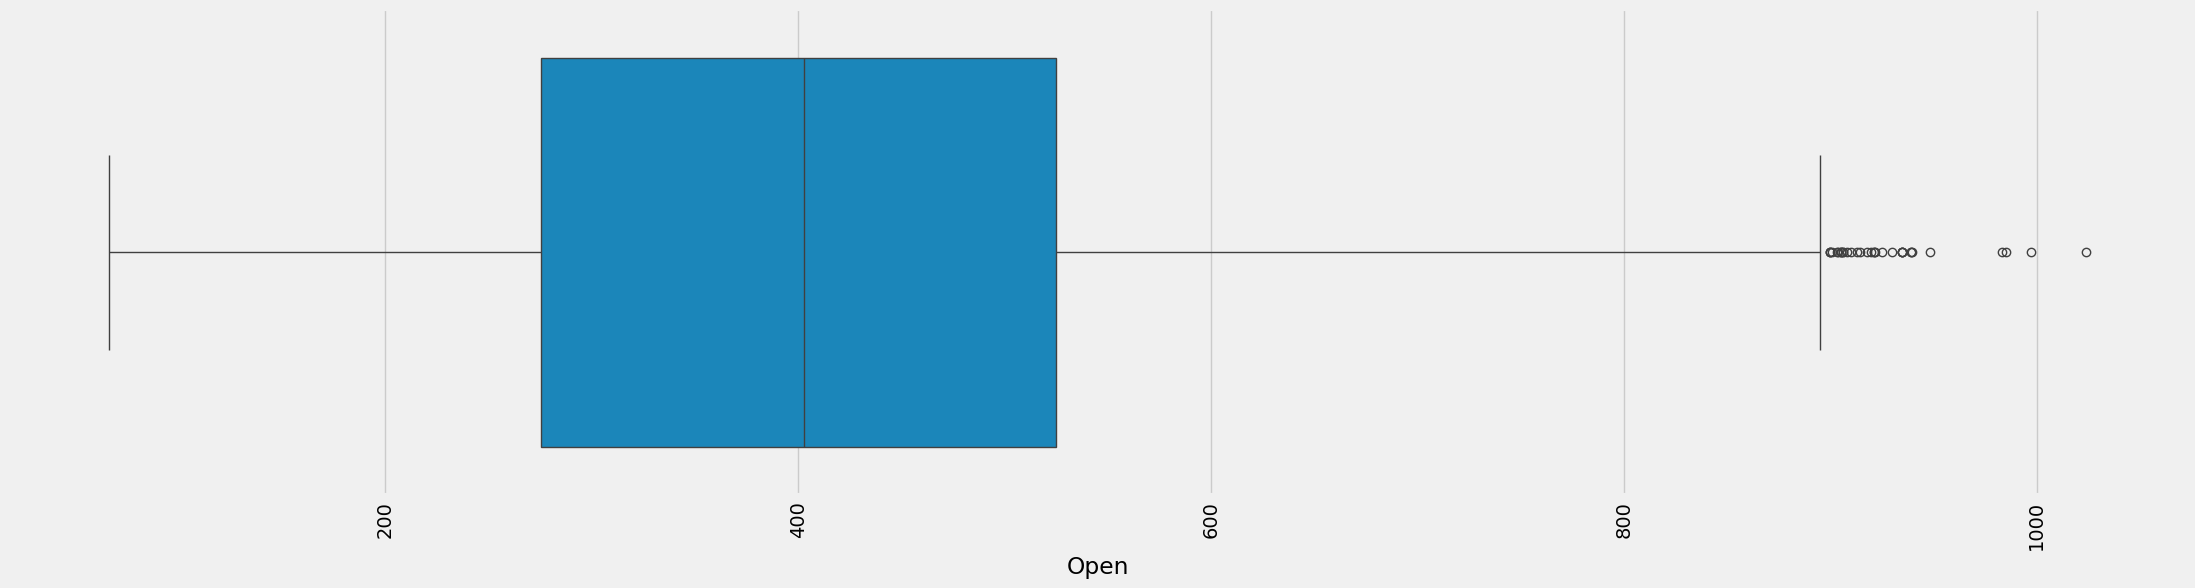

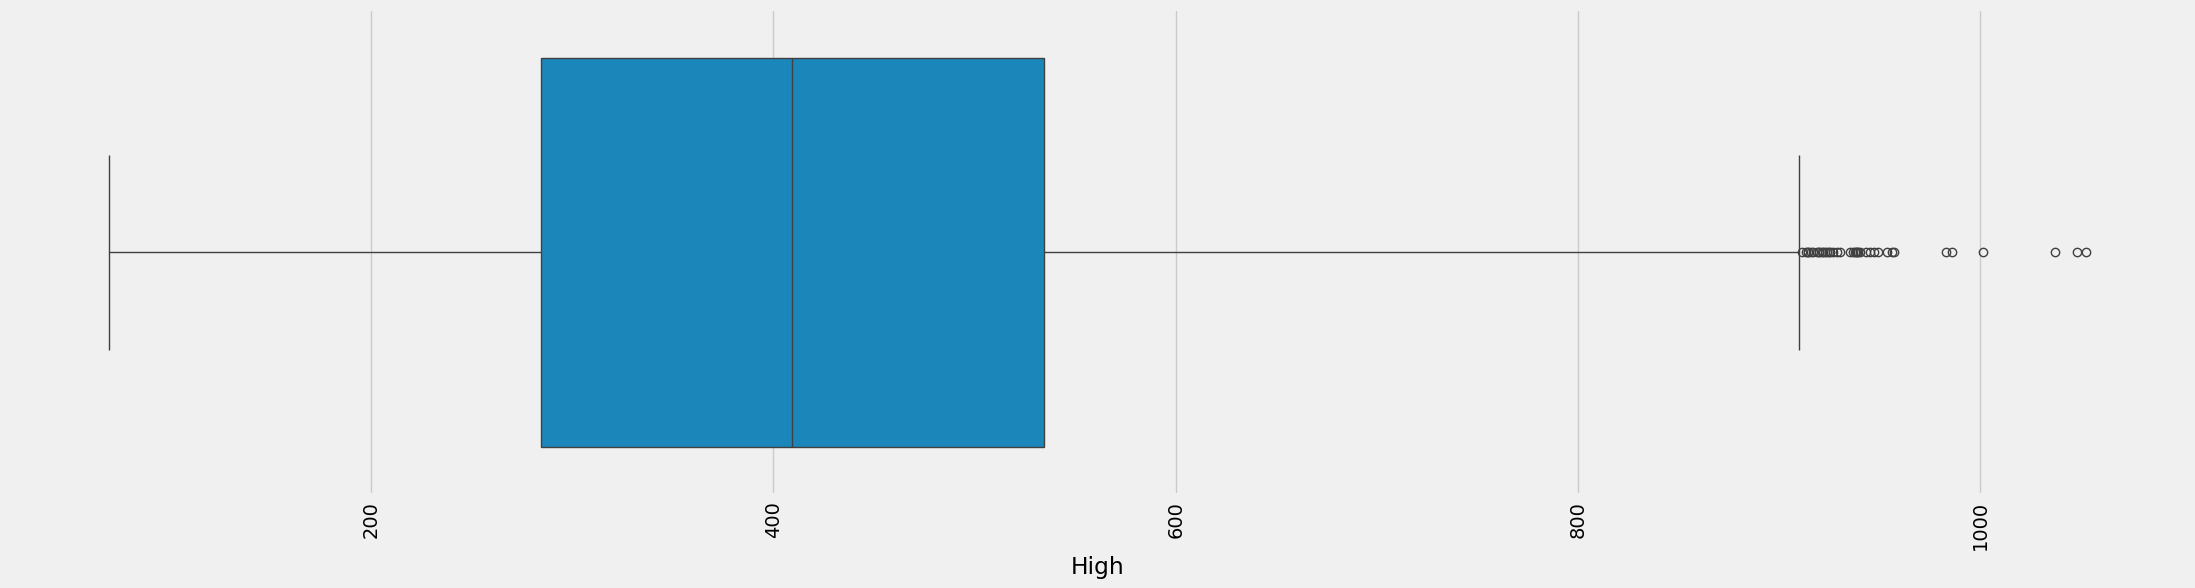

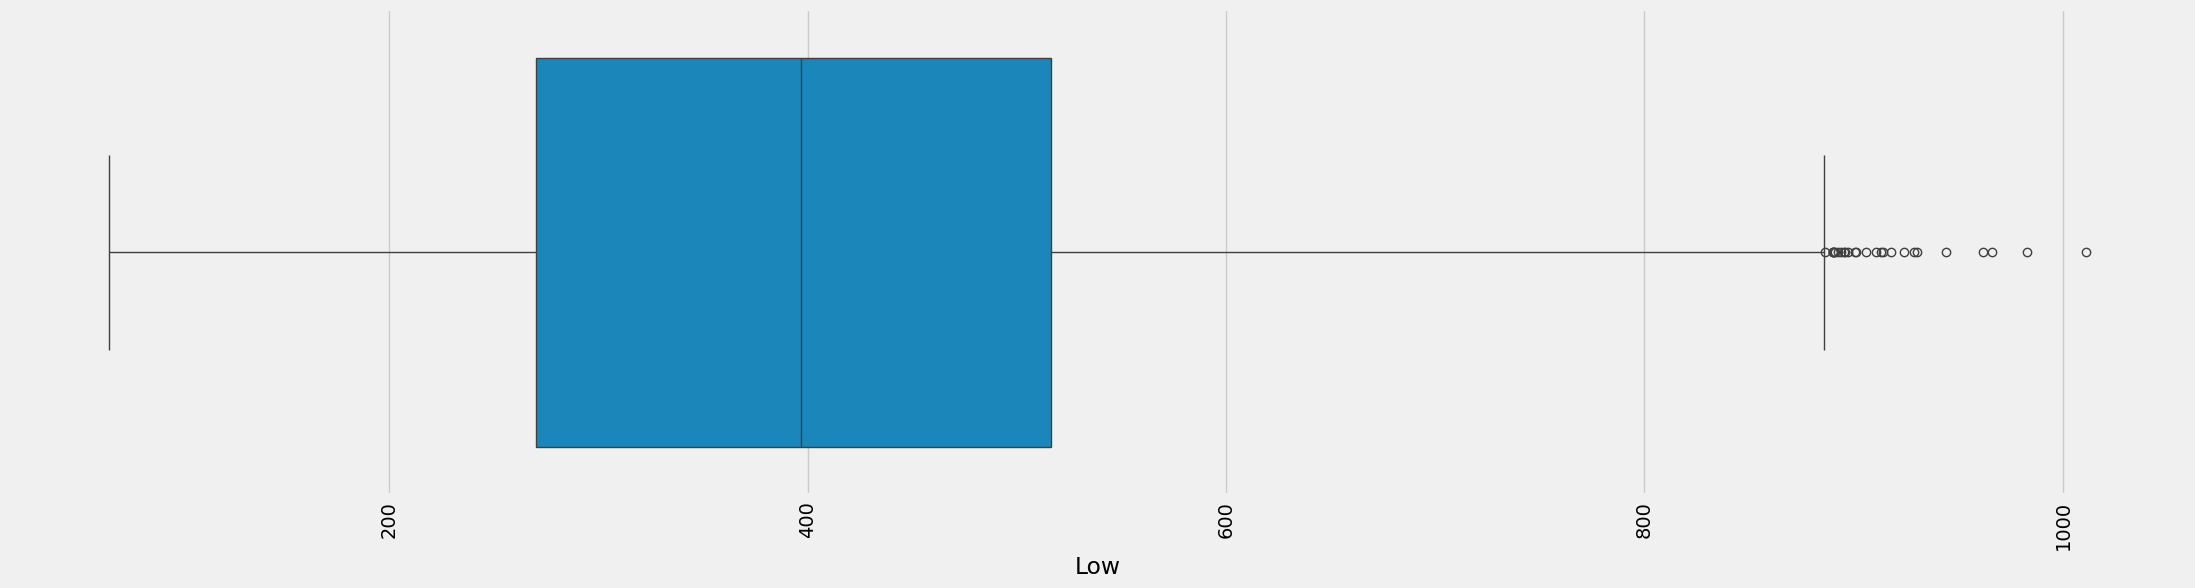

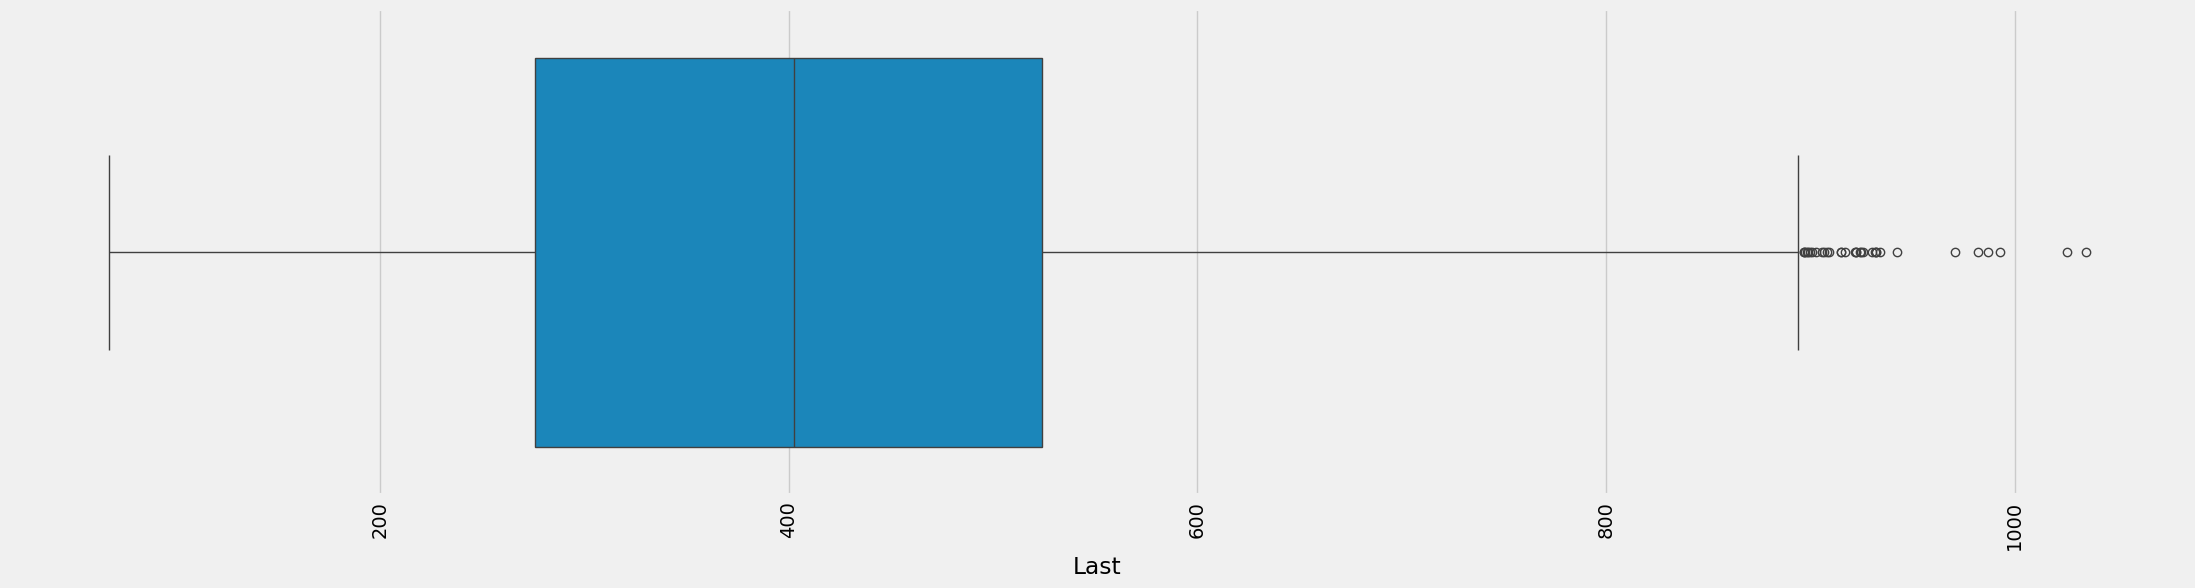

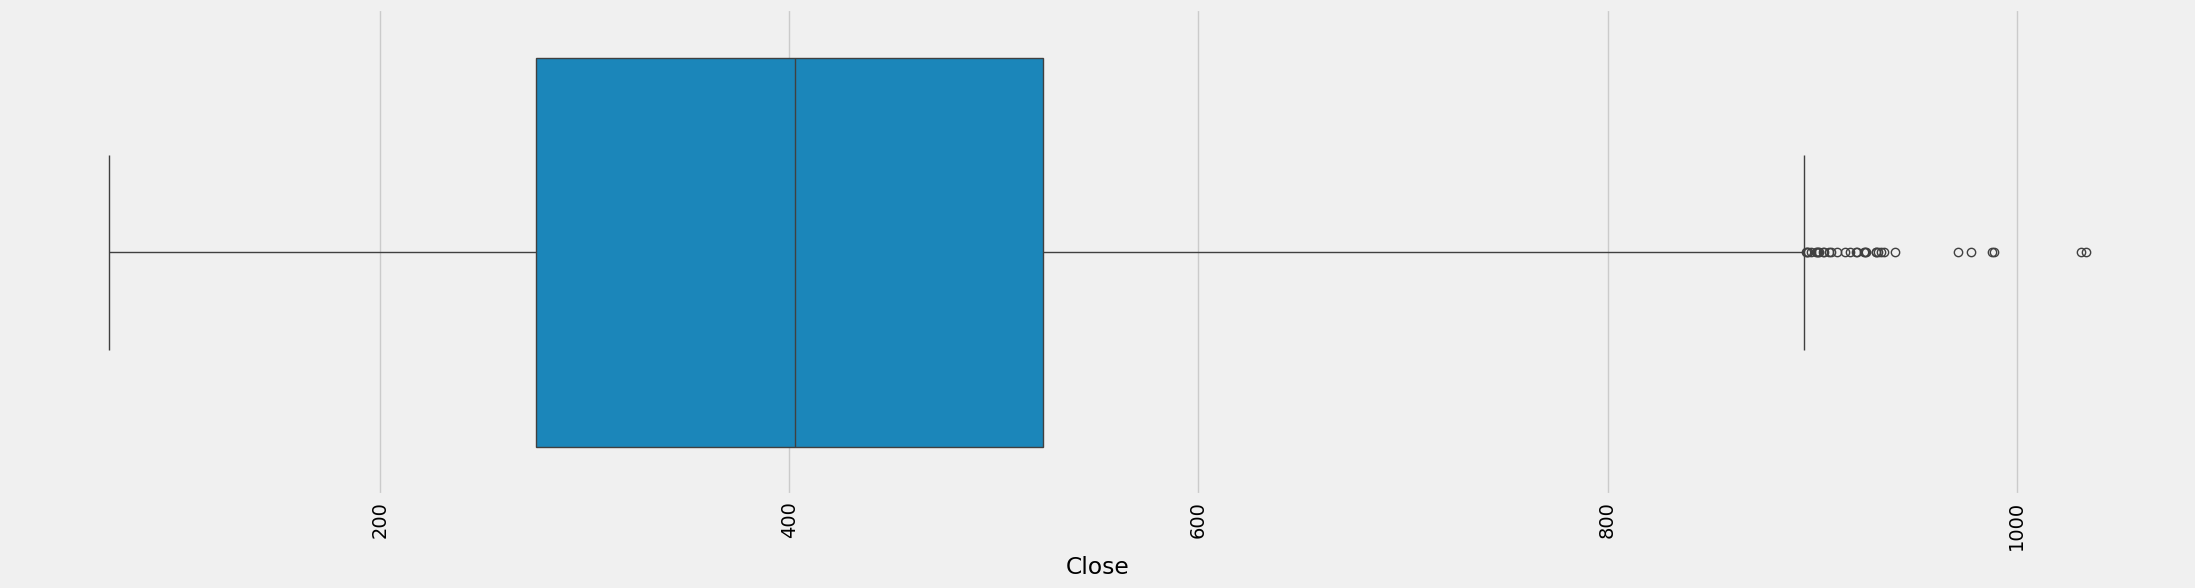

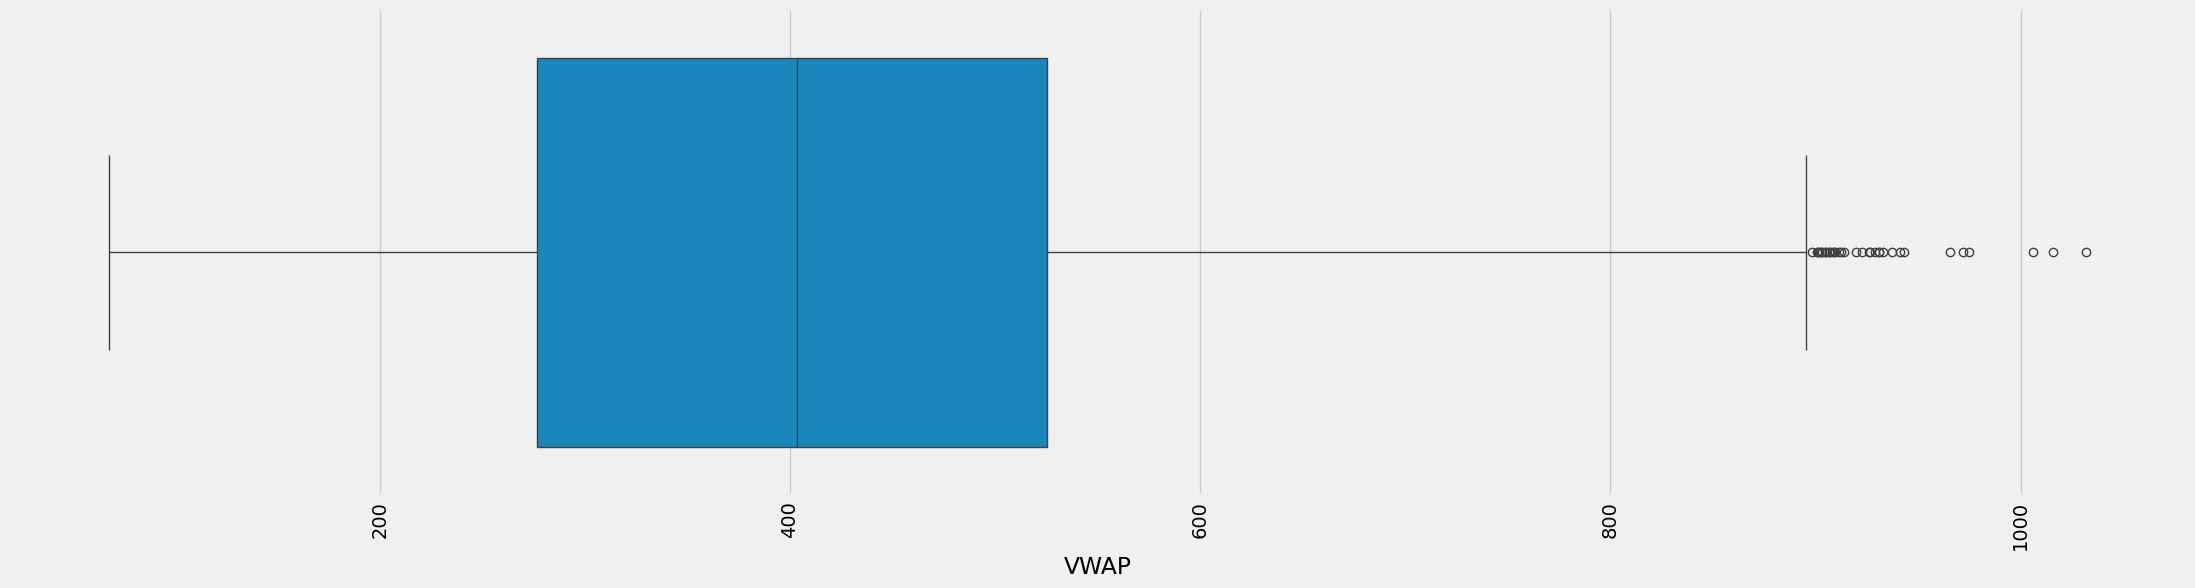

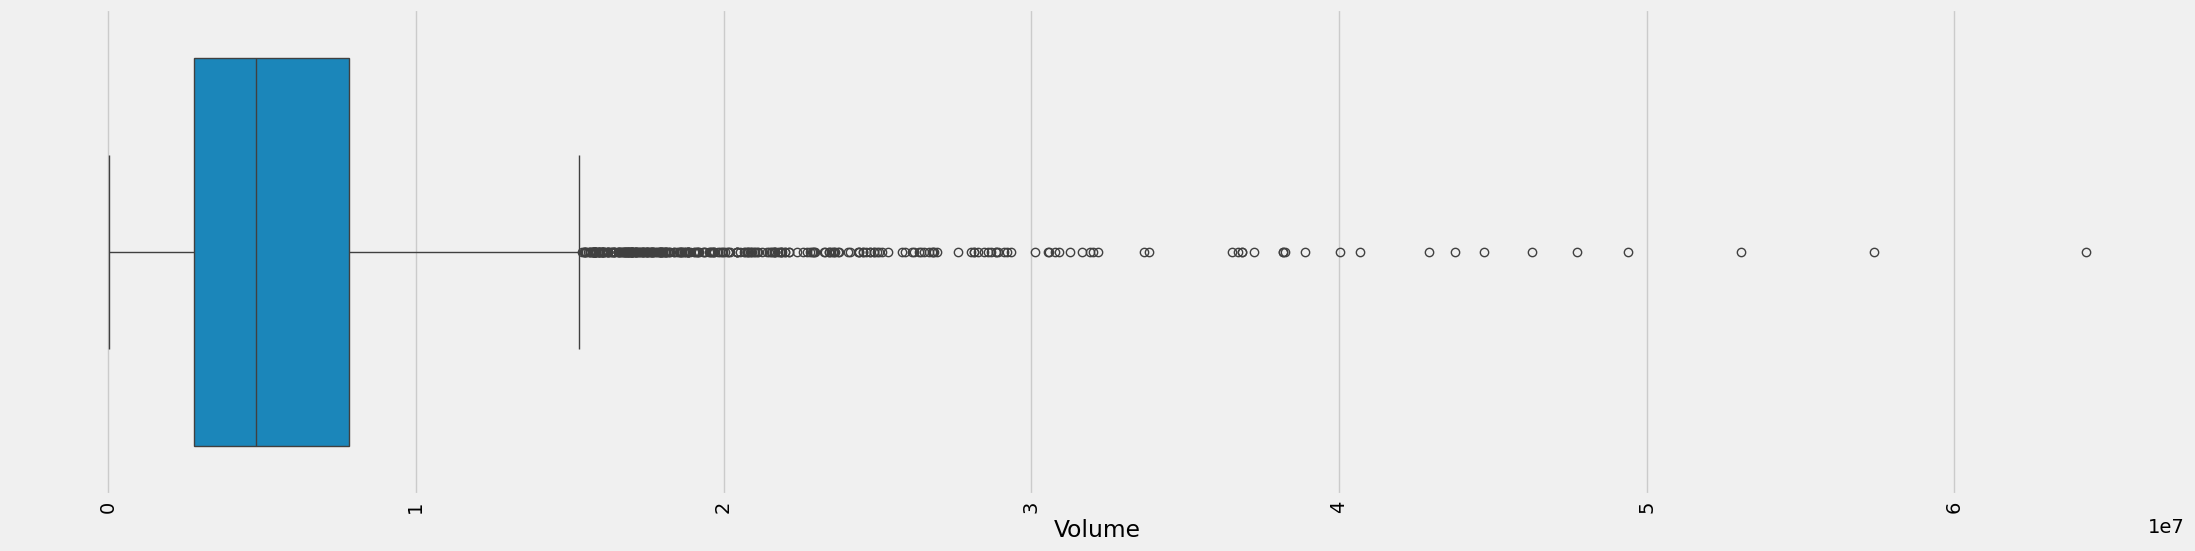

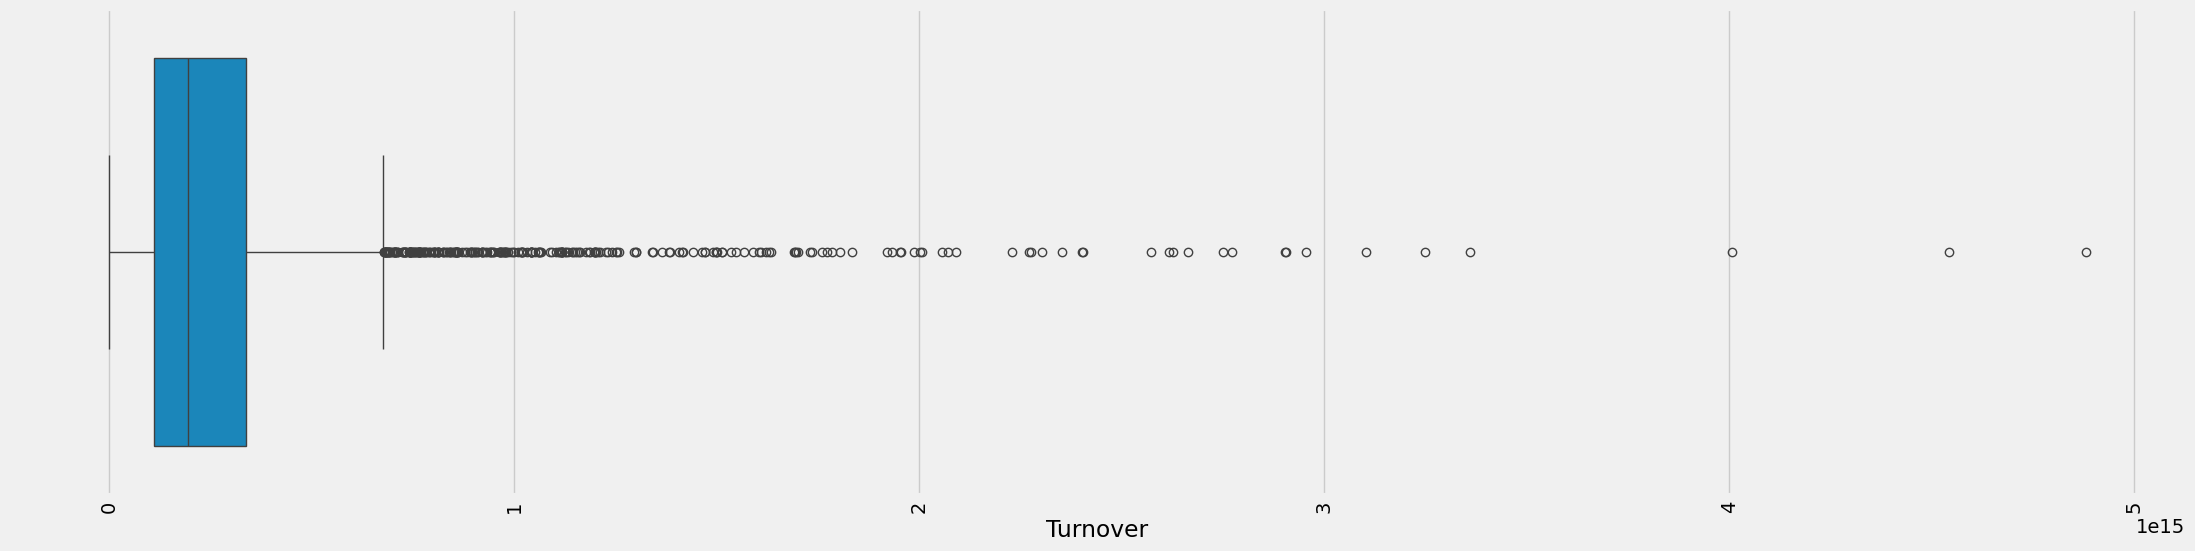

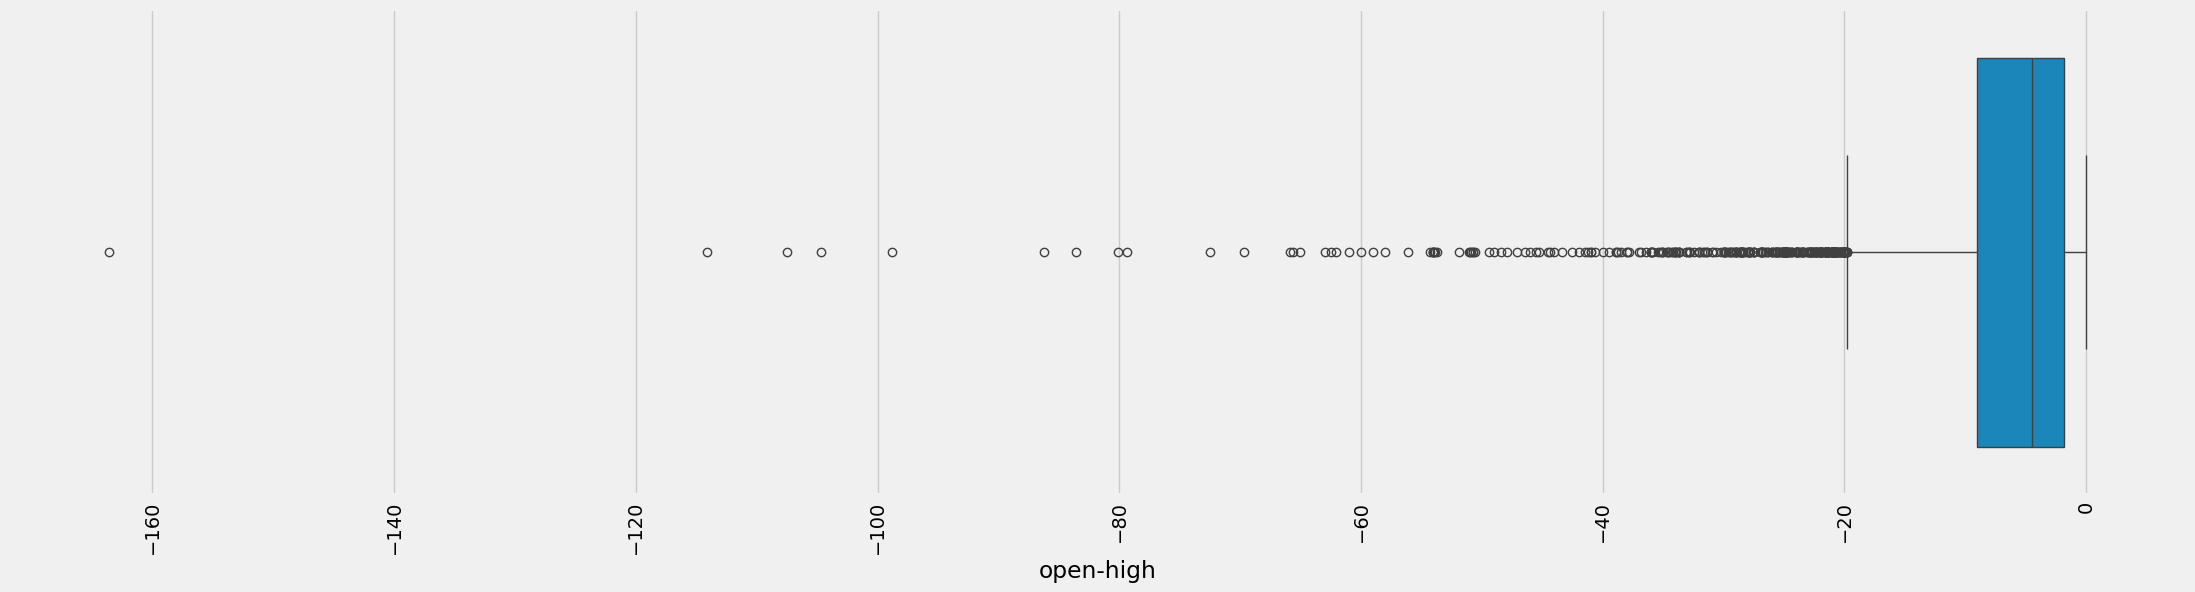

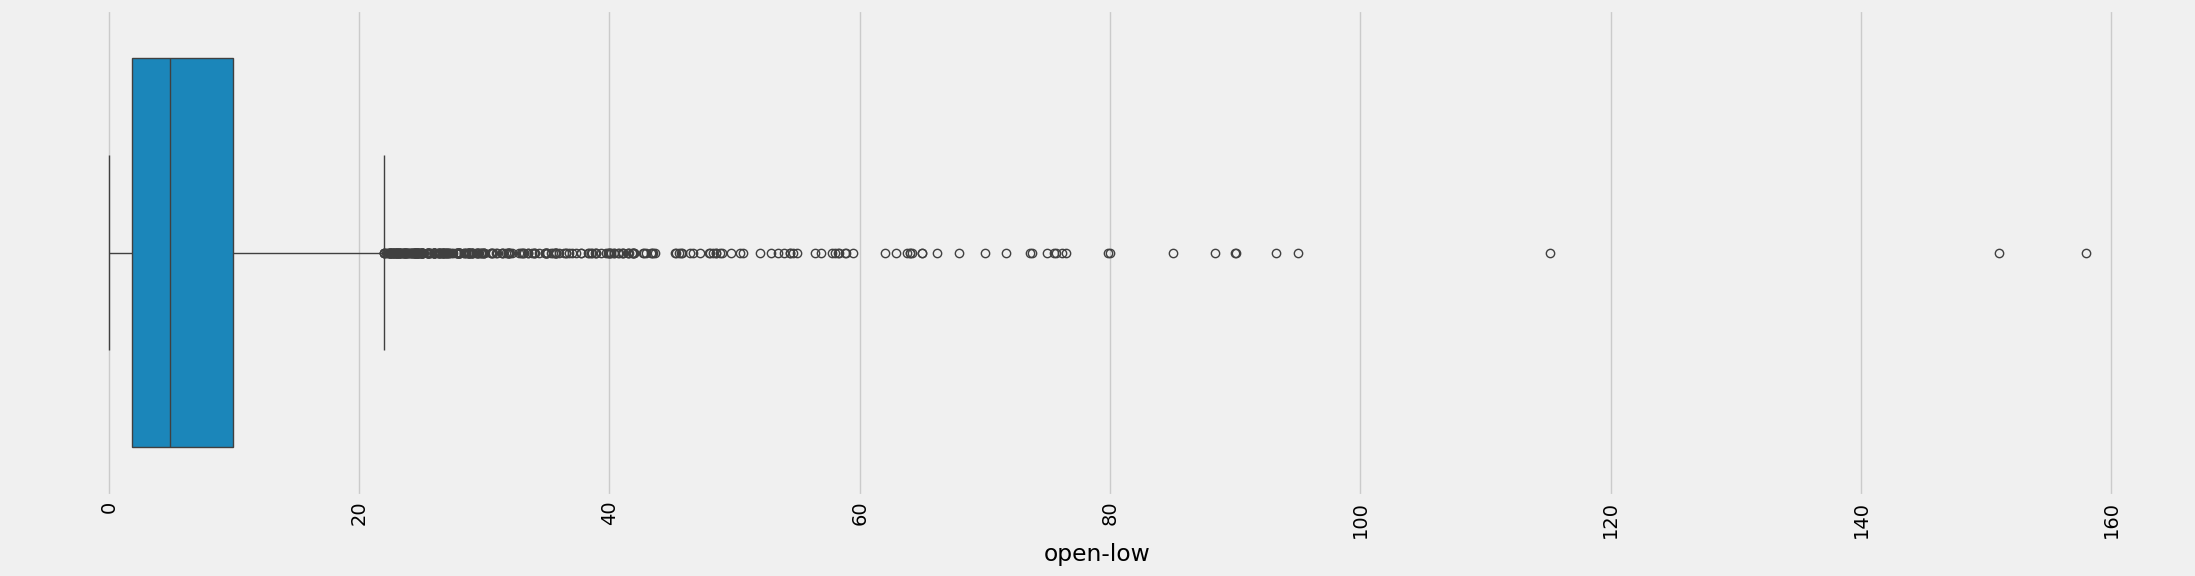

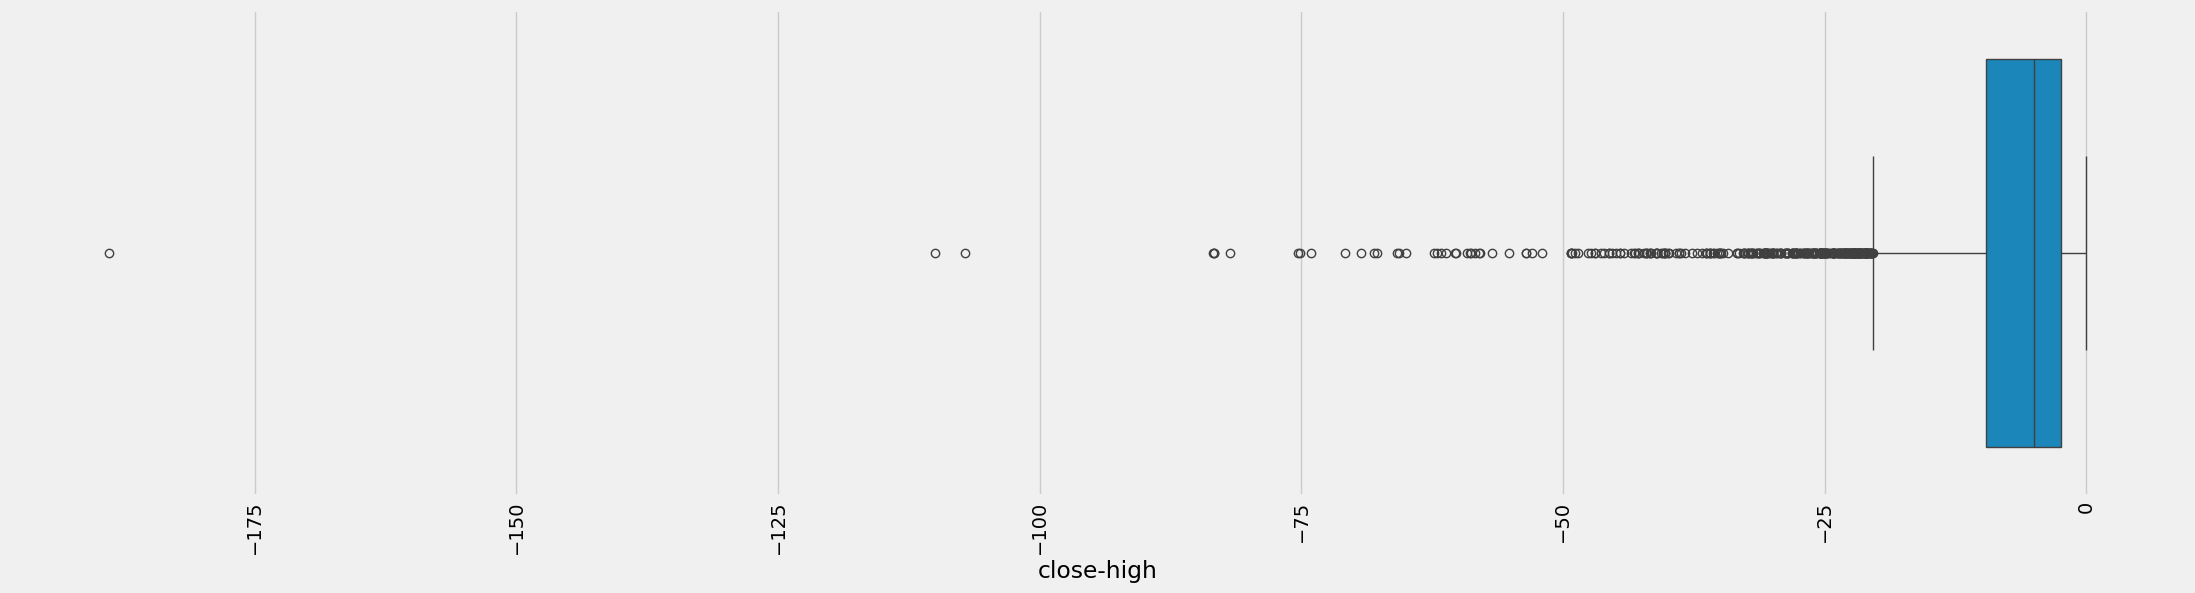

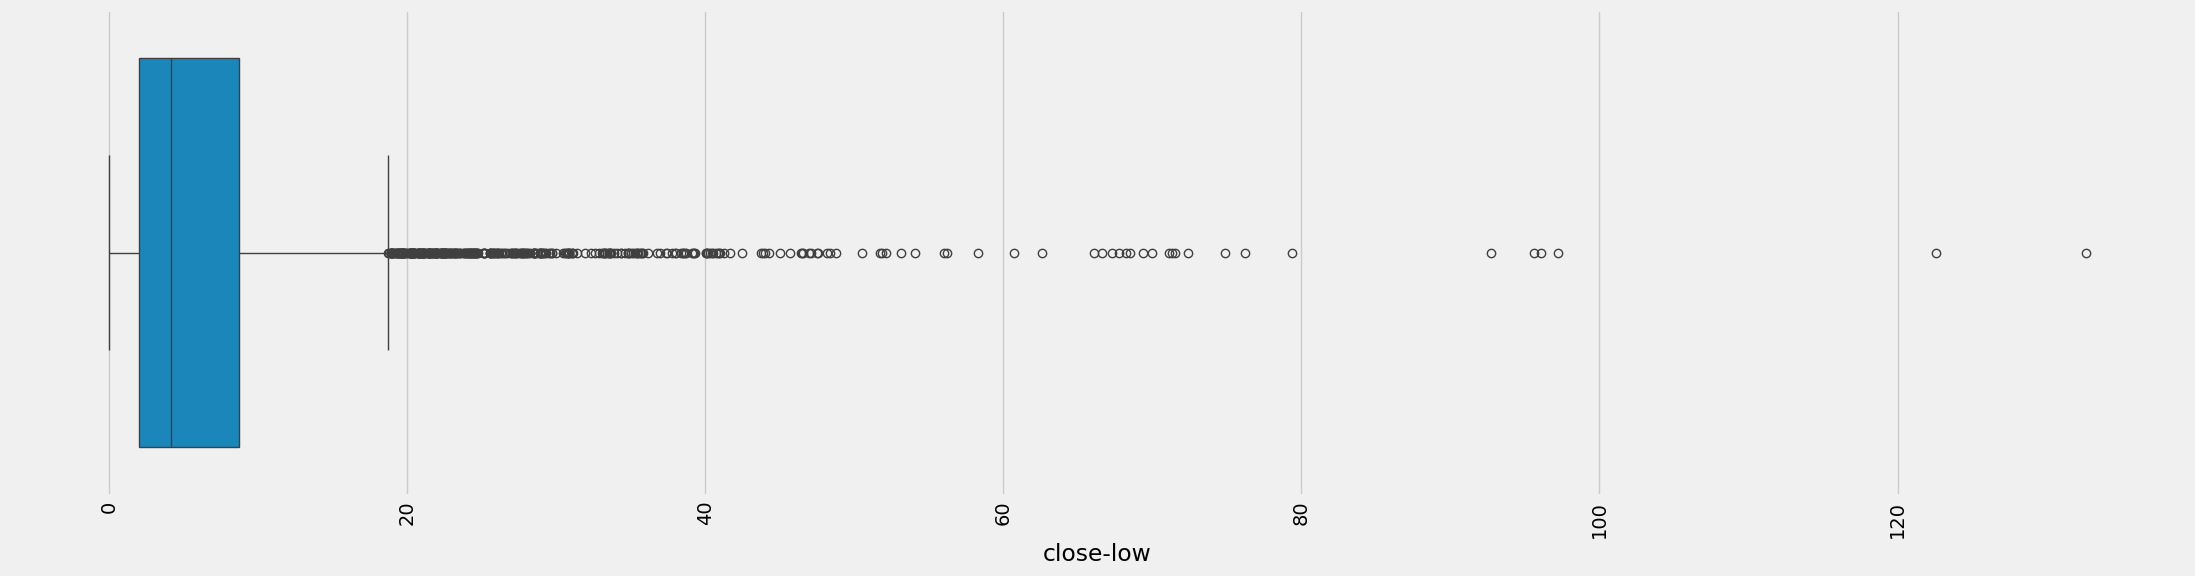

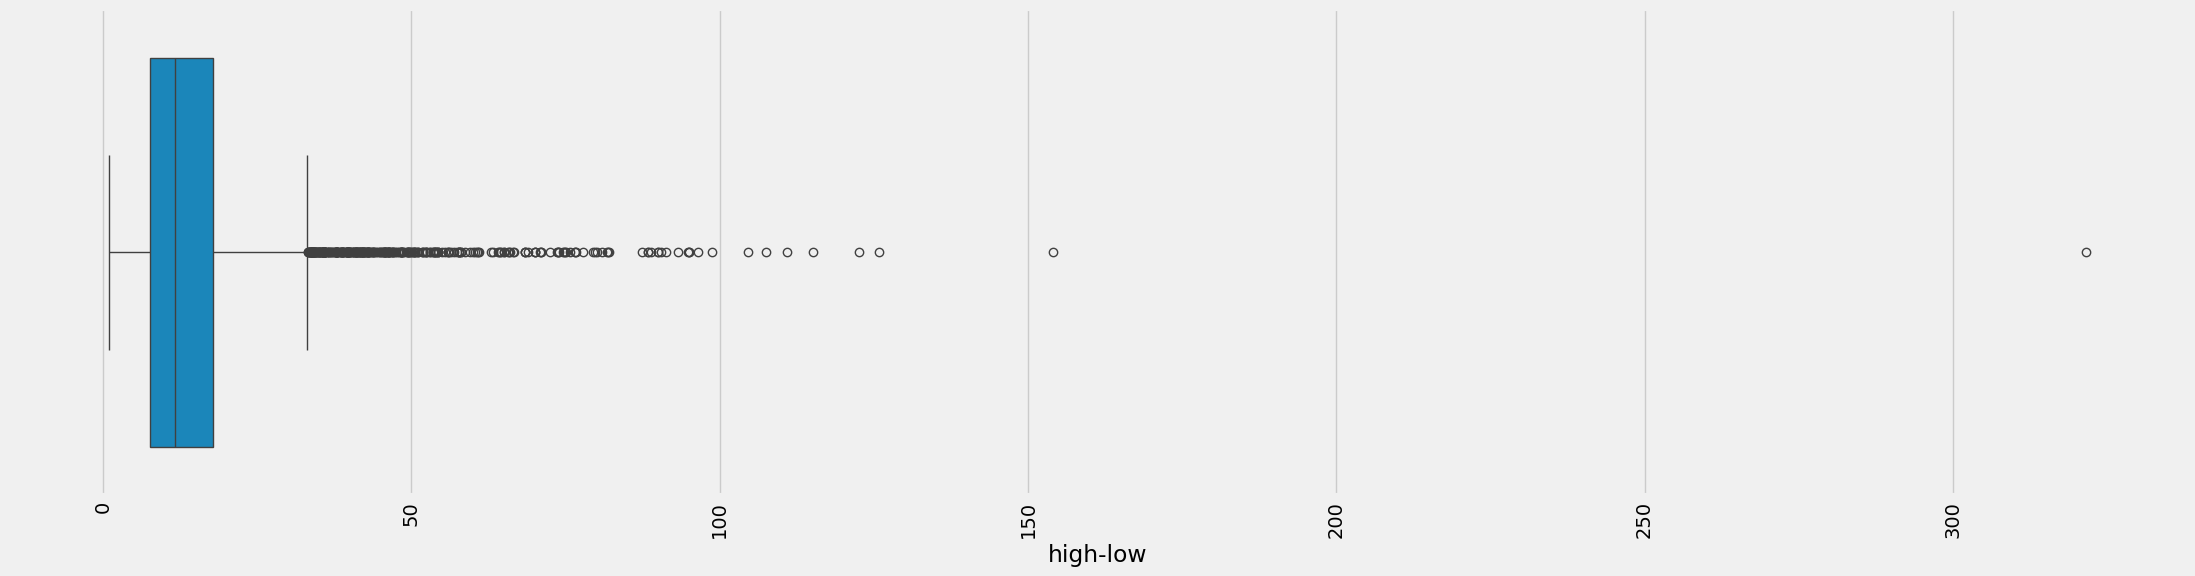

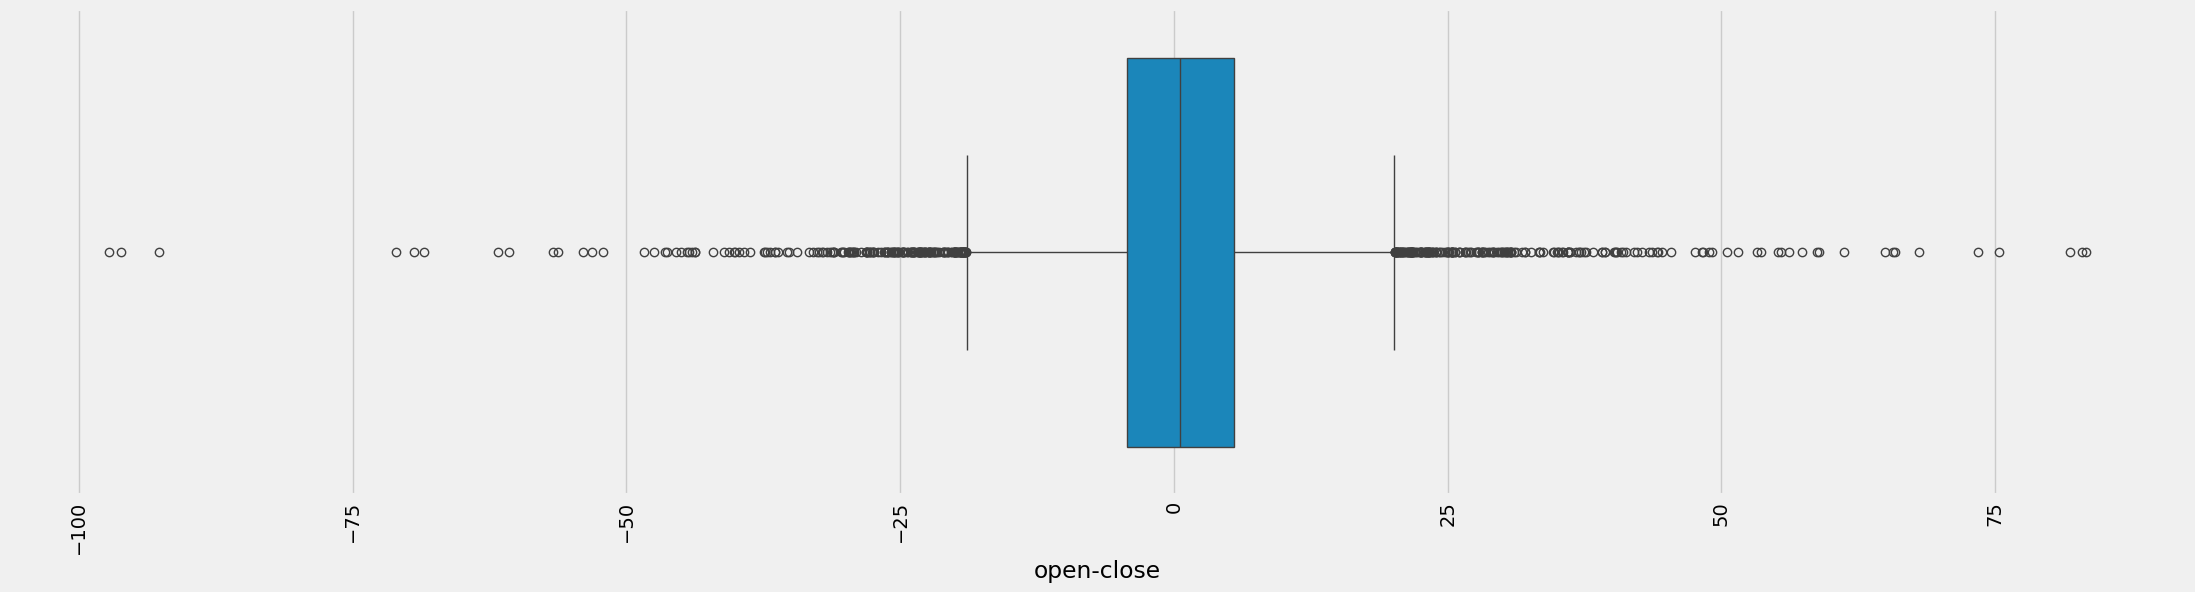

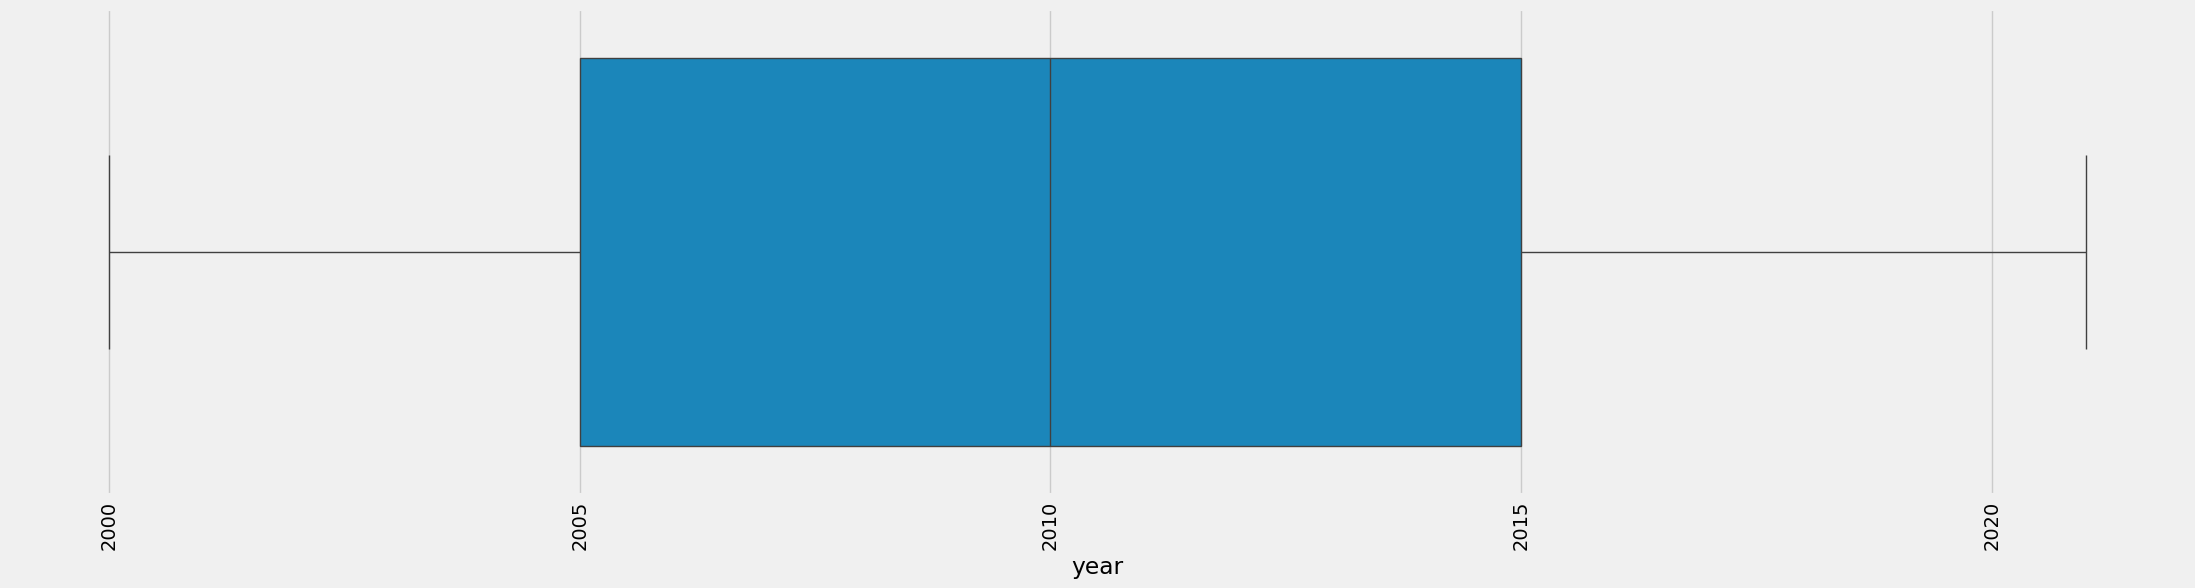

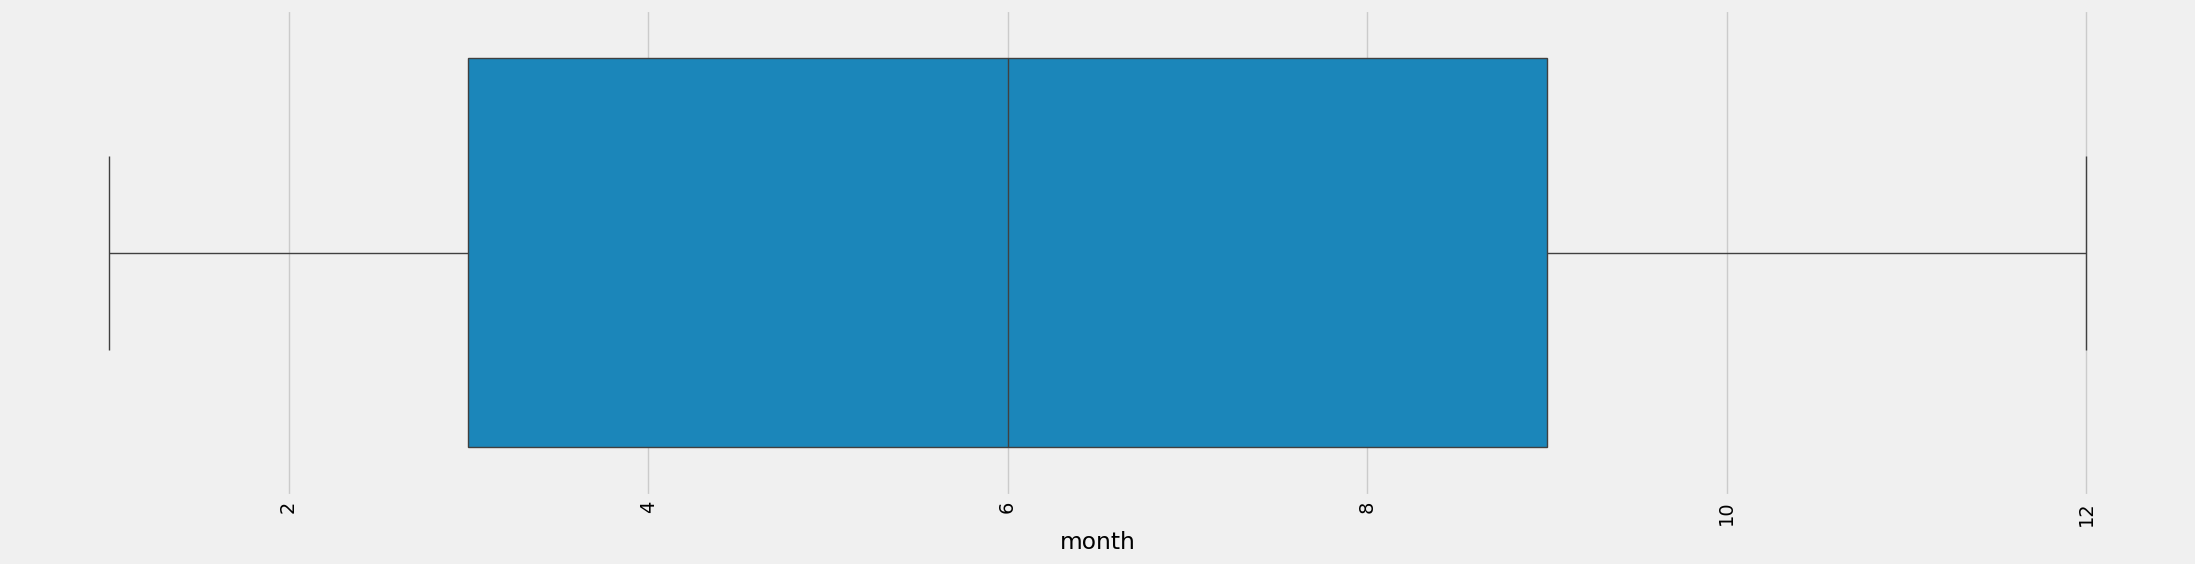

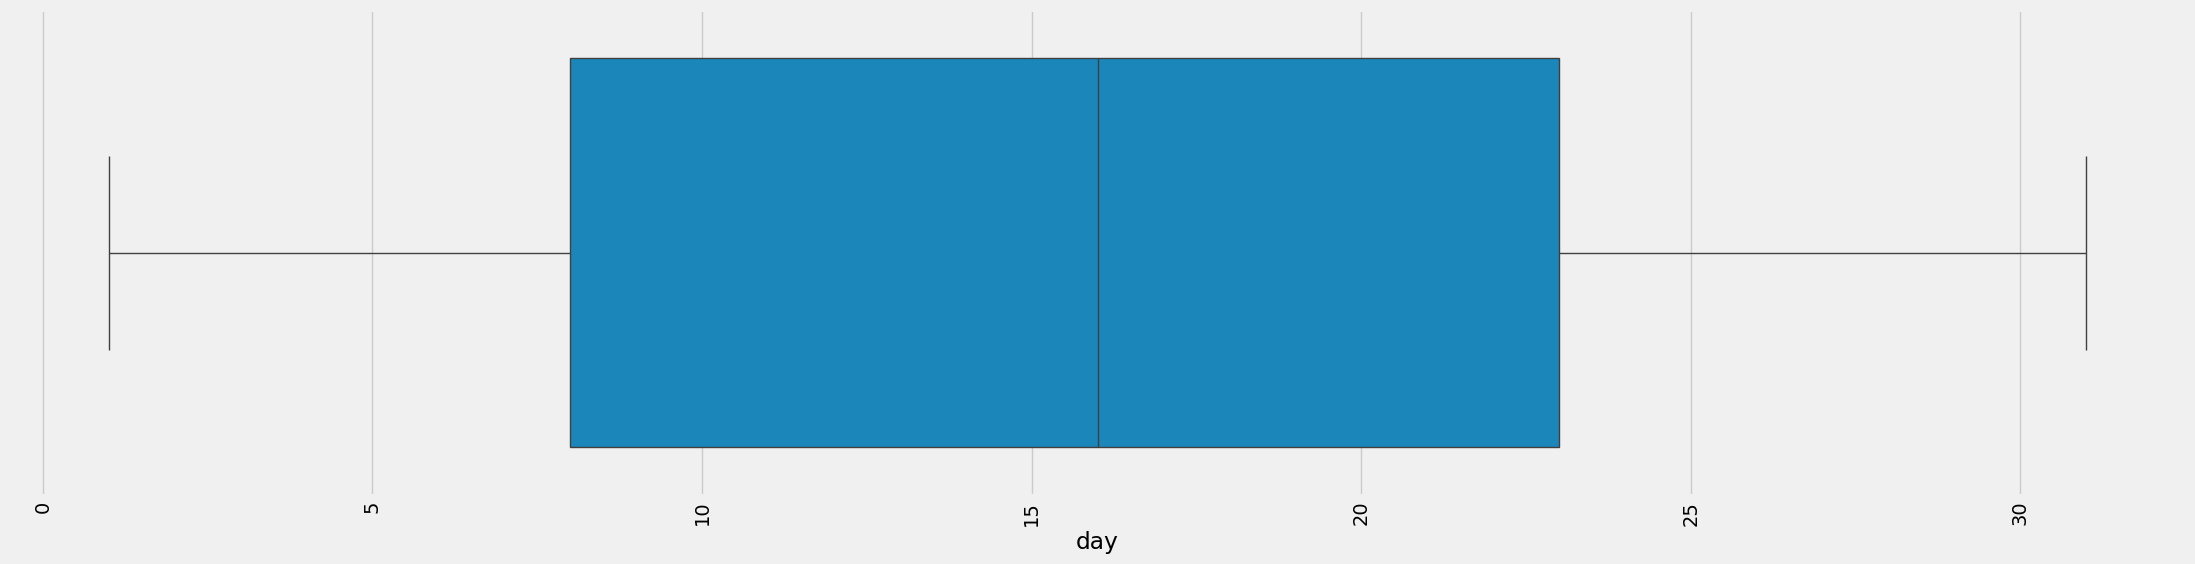

In [20]:
for column in columns:
    plt.figure(figsize = (25,6))
    sns.boxplot(x = df[column])
    plt.xticks(rotation=90)
    plt.show()

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [22]:
X = df.drop('Close', axis=1)
y = df['Close']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train= X_train.drop('Series', axis=1)

In [24]:
model = LinearRegression()

In [25]:
model.fit(X_train, y_train)

LinearRegression()

In [26]:
X_test = X_test.drop('Series', axis=1)

In [27]:
preds = model.predict(X_test)

In [28]:
from sklearn.metrics import r2_score

# Evaluate the model's accuracy
accuracy = r2_score(y_test, preds)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [29]:
preds.shape

(1062,)

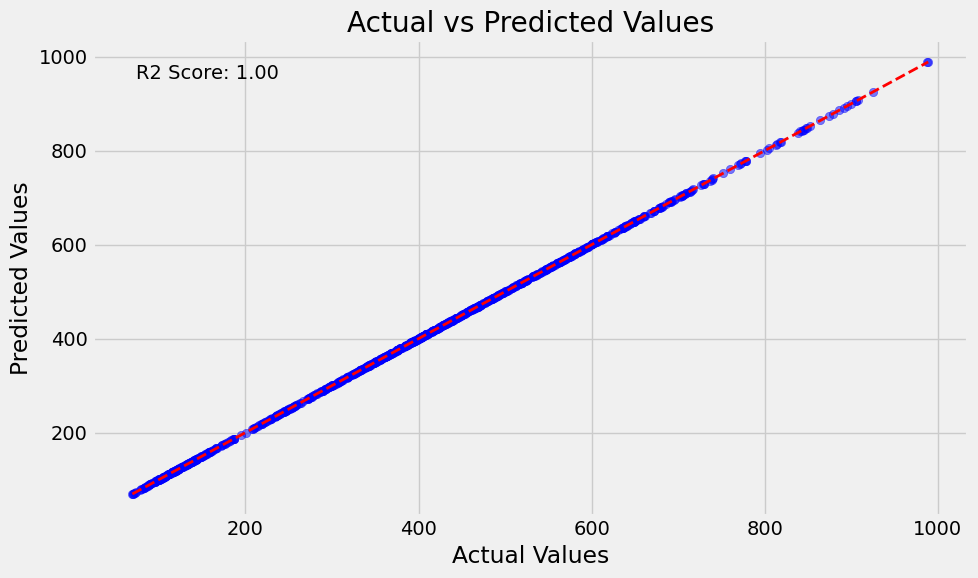

In [30]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.scatter(y_test, preds, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

plt.text(0.05, 0.95, f'R2 Score: {accuracy:.2f}', transform=plt.gca().transAxes,
         verticalalignment='top')

plt.tight_layout()
plt.show()

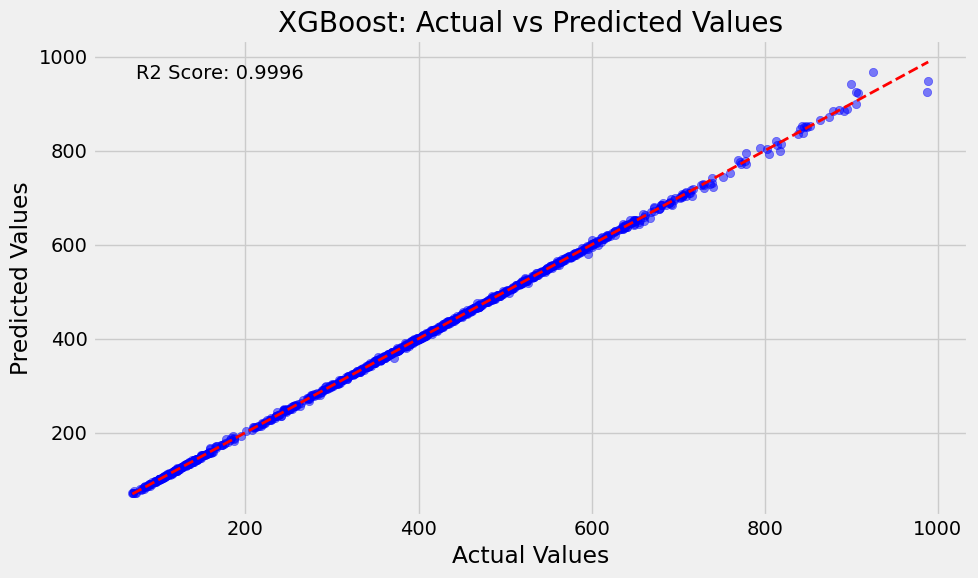

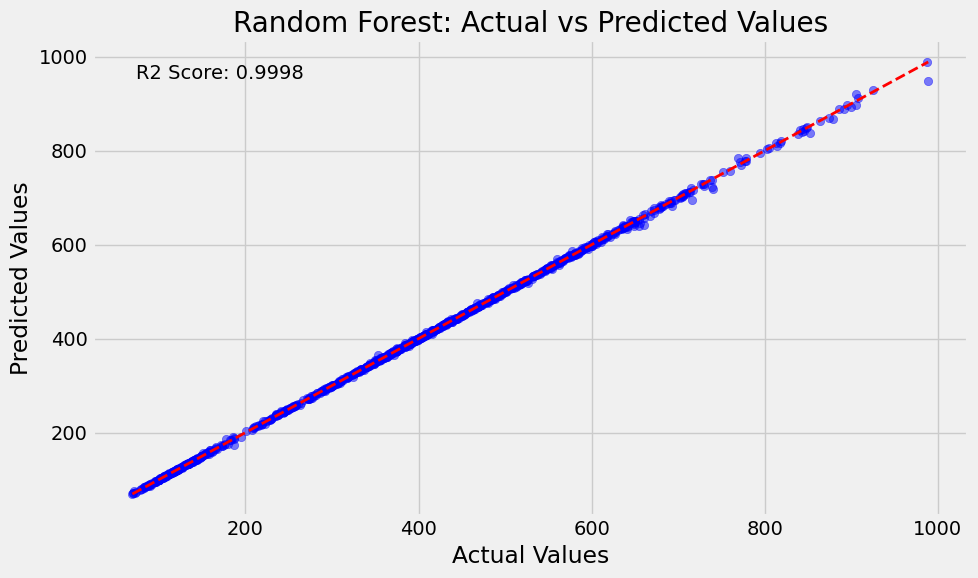

XGBoost R2 Score: 0.9995515805921448
Random Forest R2 Score: 0.9997877948517477


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

# Assuming 'df' is your DataFrame
# Select features and target
features = ['Prev Close', 'Open', 'High', 'Low', 'VWAP', 'Volume', 'Turnover', 
            'open-high', 'open-low', 'close-high', 'close-low', 'high-low', 'open-close', 
            'year', 'month', 'day']
target = 'Close'

X = df[features]
y = df[target]

# Preprocess the data
# 1. Handle categorical variables
le = LabelEncoder()
for column in X.select_dtypes(include=['object']).columns:
    X[column] = le.fit_transform(X[column].astype(str))

# 2. Handle missing values
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost model
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)
xgb_accuracy = r2_score(y_test, xgb_preds)

# Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_accuracy = r2_score(y_test, rf_preds)

# Function to create scatter plot
def plot_predictions(y_true, y_pred, title, accuracy):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, color='blue', alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(title)
    plt.text(0.05, 0.95, f'R2 Score: {accuracy:.4f}', transform=plt.gca().transAxes,
             verticalalignment='top')
    plt.tight_layout()

# Plot for XGBoost
plot_predictions(y_test, xgb_preds, 'XGBoost: Actual vs Predicted Values', xgb_accuracy)
plt.show()

# Plot for Random Forest
plot_predictions(y_test, rf_preds, 'Random Forest: Actual vs Predicted Values', rf_accuracy)
plt.show()

# Print accuracies
print("XGBoost R2 Score:", xgb_accuracy)
print("Random Forest R2 Score:", rf_accuracy)

Epoch 1/50


c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - loss: 0.0797 - val_loss: 4.9954e-04
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 4.2342e-04 - val_loss: 3.9122e-04
Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 2.8493e-04 - val_loss: 2.9907e-04
Epoch 4/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 2.7650e-04 - val_loss: 2.4589e-04
Epoch 5/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 2.4052e-04 - val_loss: 2.3791e-04
Epoch 6/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 2.5598e-04 - val_loss: 2.3045e-04
Epoch 7/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.3509e-04 - val_loss: 2.4546e-04
Epoch 8/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 2.4329e-04 - val_loss: 2.2261e-04
Epoch 9/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 2.1949e-04 - val_loss: 2.0967e-04
Epoch 10/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 2.2667e-04 - val_loss: 2.3491e-04
Epoch 11/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.

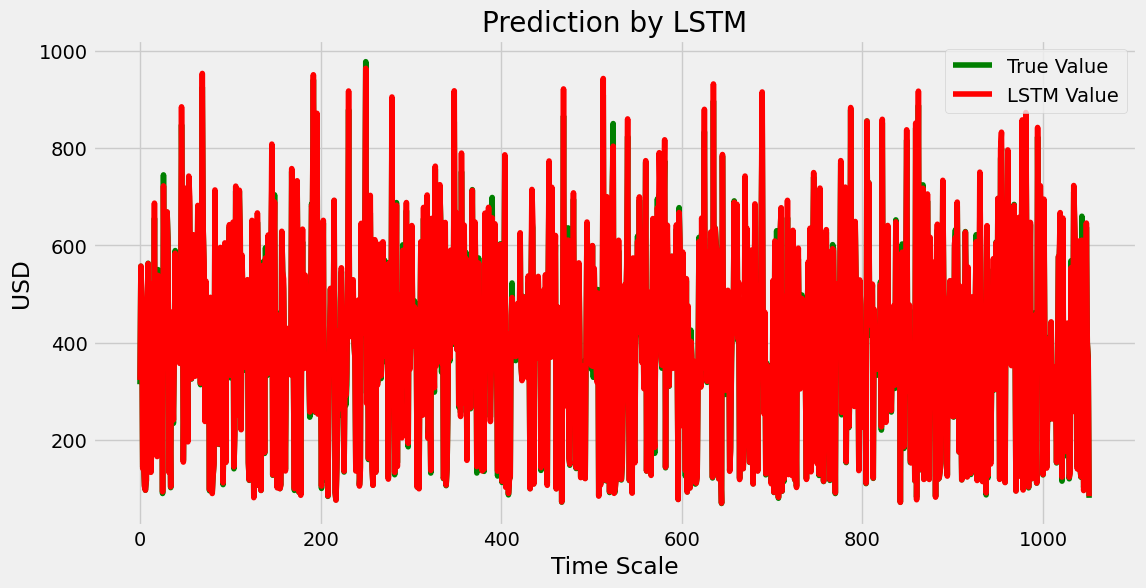

LSTM R2 Score: 0.9946765769337287


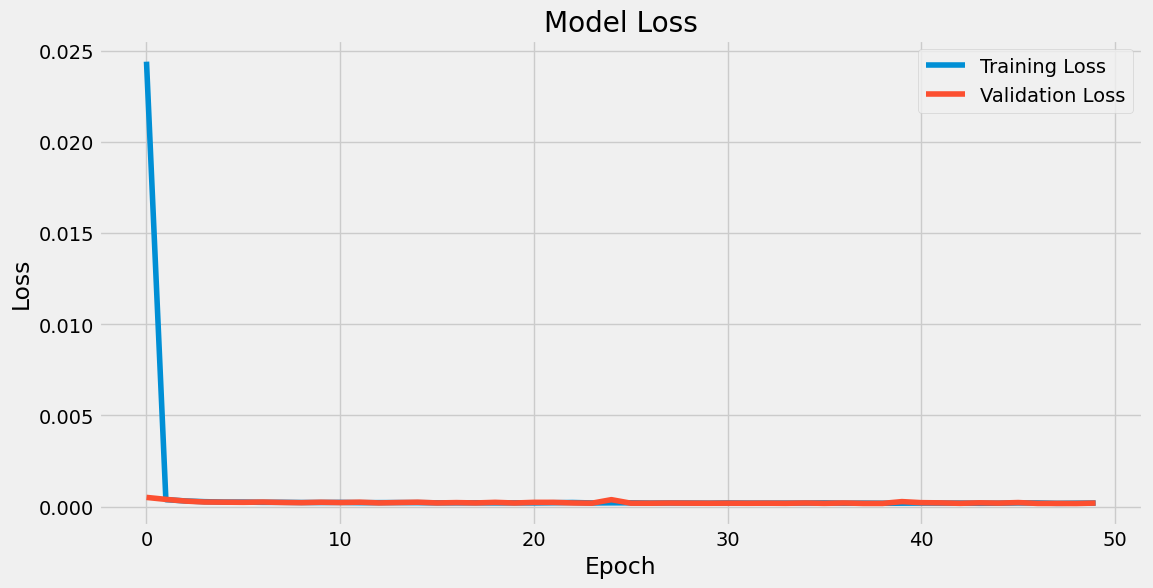

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Assuming 'df' is your DataFrame and it's sorted by date
# Select features and target
features = ['Prev Close', 'Open', 'High', 'Low', 'VWAP', 'Volume', 'Turnover', 
            'open-high', 'open-low', 'close-high', 'close-low', 'high-low', 'open-close']
target = 'Close'

# Prepare the data
X = df[features].values
y = df[target].values

# Normalize the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# Create sequences for LSTM
def create_sequences(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 50  # You can adjust this
X_seq, y_seq = create_sequences(X_scaled, y_scaled, time_steps)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(time_steps, X.shape[1])),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions and test data
y_test_inv = scaler_y.inverse_transform(y_test)
y_pred_inv = scaler_y.inverse_transform(y_pred)

# Calculate R2 score
lstm_accuracy = r2_score(y_test_inv, y_pred_inv)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='True Value', color='green')
plt.plot(y_pred_inv, label='LSTM Value', color='red')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('USD')
plt.legend()
plt.show()

# Print accuracy
print("LSTM R2 Score:", lstm_accuracy)

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()